<h1>Marketing Campaign Optimization</h1> <h2>Project Goal</h2> The project aims to optimize marketing campaigns by analyzing key factors affecting conversion, identifying the best promotion strategies, and building an effective model to predict the success of marketing activities.
<h2>Project Stages</h2>
<h4>1. Data Preparation</h4> Removing duplicates<br> Handling outliers and missing values<br> Examining variable distributions<br>
<h4>2. Exploratory Analysis</h4> Identifying the most successful strategies that lead to high conversion rates.<br> Determining key influencing factors: advertising channels, demographics, engagement.<br> Analyzing correlations between variables to understand dependencies.<br>
<h4>3. Budget Optimization</h4>
Budget allocation across different campaign types and channels using weights and factor importance for conversion

<h2>Features</h2>

<h4>Demographic Information</h4>

CustomerID: Unique identifier for each customer.<br>
Age: Age of the customer.<br>
Gender: Gender of the customer (Male/Female).<br>
Income: Annual income of the customer in USD.<br>
<h4>Marketing-specific Variables</h4>

CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).<br>
CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).<br>
AdSpend: Amount spent on the marketing campaign in USD.<br>
ClickThroughRate: Rate at which customers click on the marketing content.<br>
ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).<br>
AdvertisingPlatform: Confidential.<br>
AdvertisingTool: Confidential.<br>
<h4>Customer Engagement Variables</h4>

WebsiteVisits: Number of visits to the website.<br>
PagesPerVisit: Average number of pages visited per session.<br>
TimeOnSite: Average time spent on the website per visit (in minutes).<br>
SocialShares: Number of times the marketing content was shared on social media.<br>
EmailOpens: Number of times marketing emails were opened.<br>
EmailClicks: Number of times links in marketing emails were clicked.<br>
<h4>Historical Data</h4>

PreviousPurchases: Number of previous purchases made by the customer.<br>
LoyaltyPoints: Number of loyalty points accumulated by the customer.<br>
<h4>Target Variable</h4>

Conversion: Binary variable indicating whether the customer converted (1) or not (0).<br>

In [538]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve,\
roc_auc_score, roc_curve, fbeta_score, cohen_kappa_score, matthews_corrcoef, auc
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [540]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [542]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


<h2>Data preparation</h2>

In [545]:
df = df.drop(columns=["AdvertisingPlatform", "AdvertisingTool"])

In [547]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Income               0
CampaignChannel      0
CampaignType         0
AdSpend              0
ClickThroughRate     0
ConversionRate       0
WebsiteVisits        0
PagesPerVisit        0
TimeOnSite           0
SocialShares         0
EmailOpens           0
EmailClicks          0
PreviousPurchases    0
LoyaltyPoints        0
Conversion           0
dtype: int64

In [549]:
df.duplicated().sum()

0

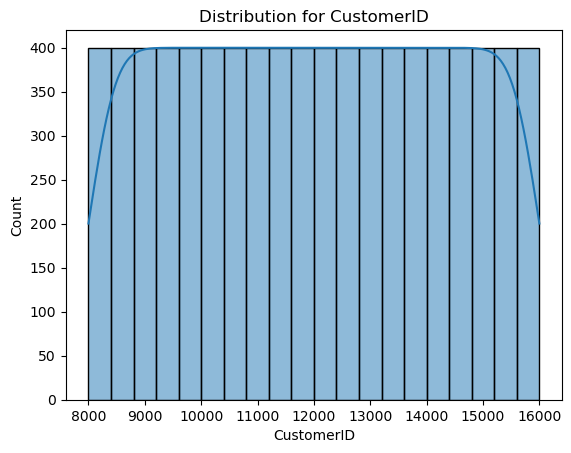

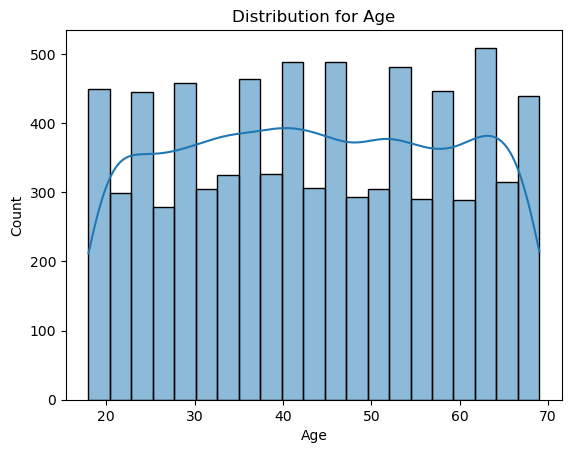

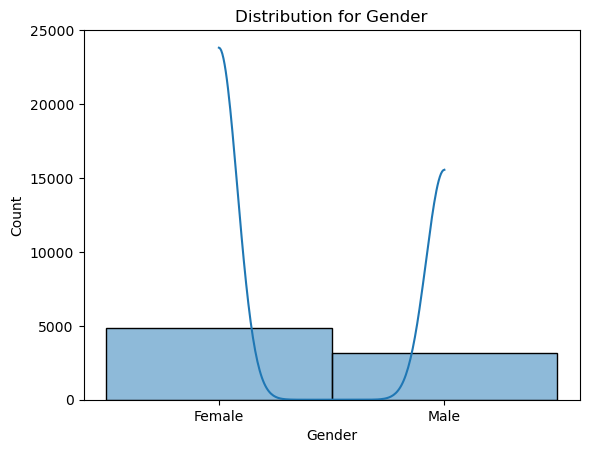

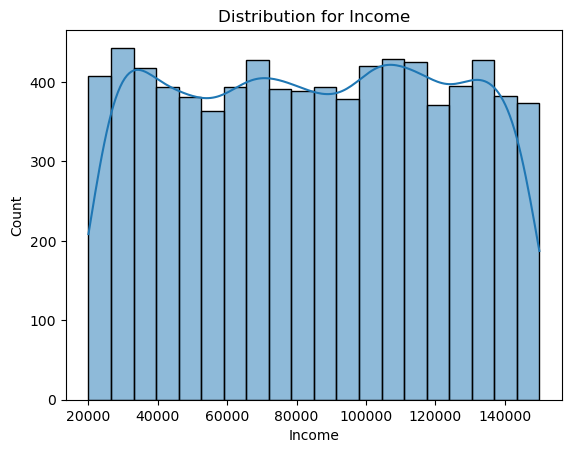

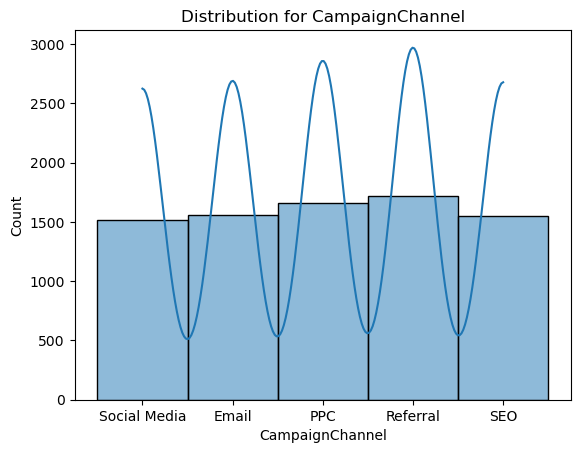

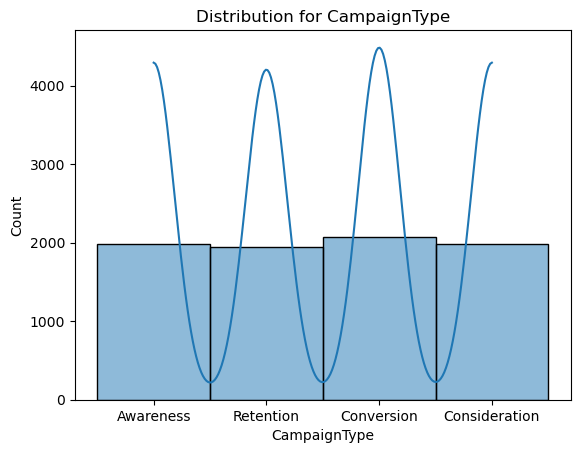

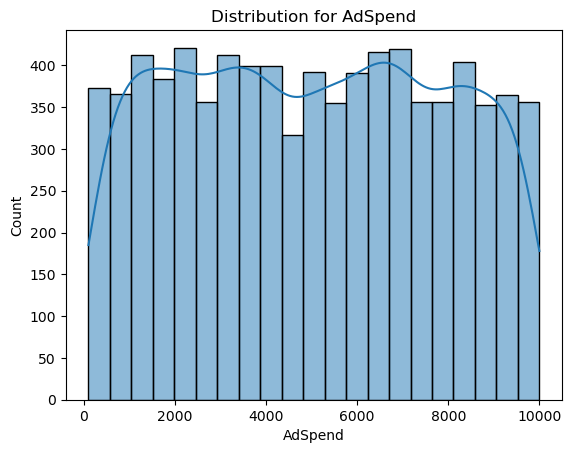

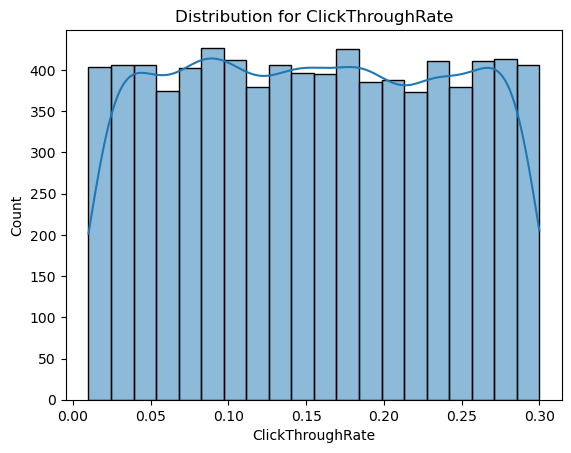

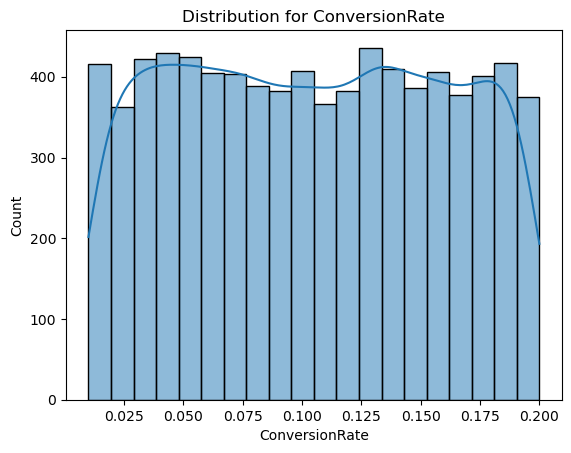

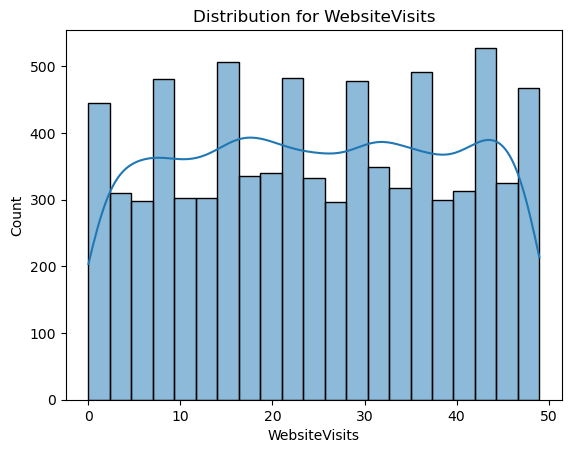

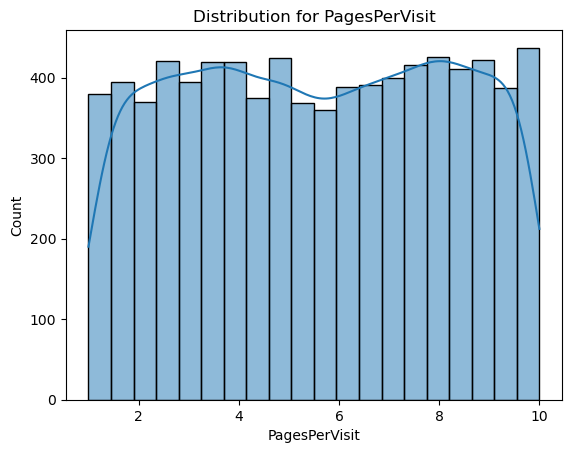

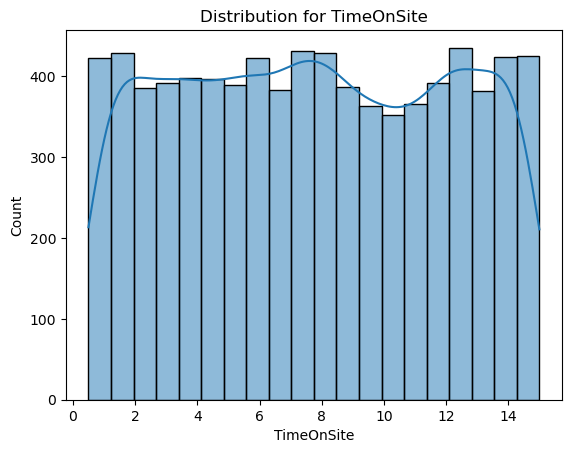

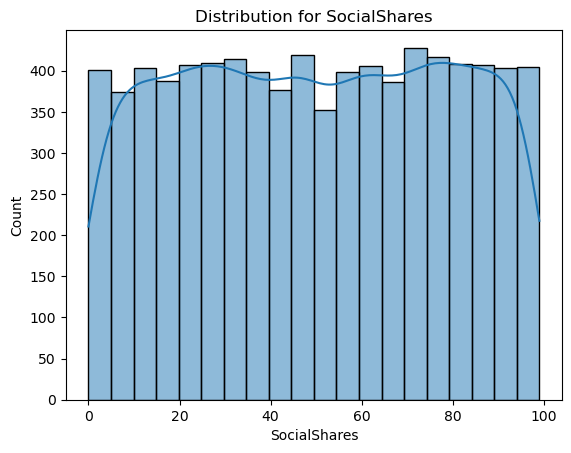

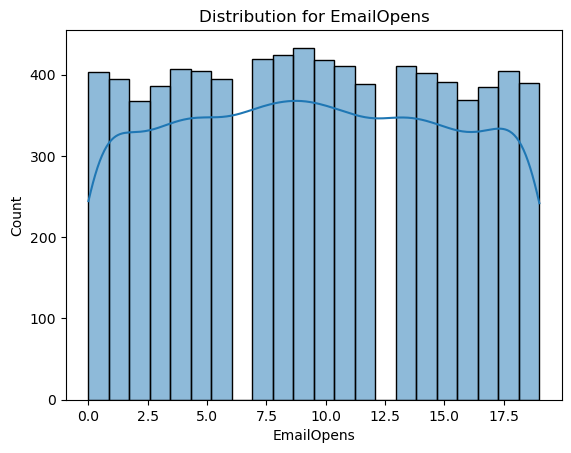

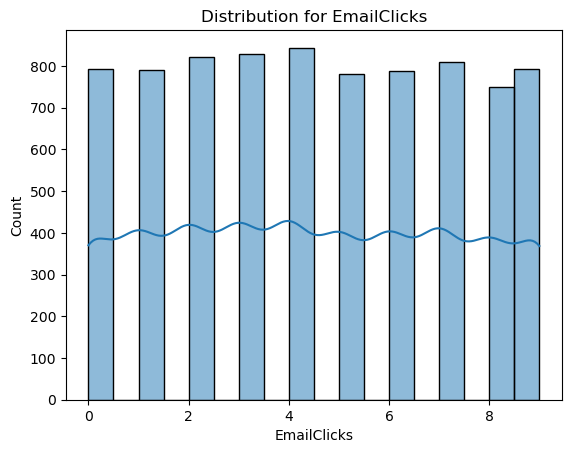

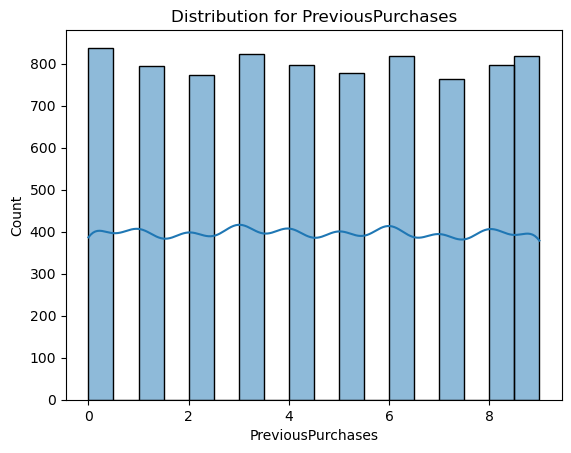

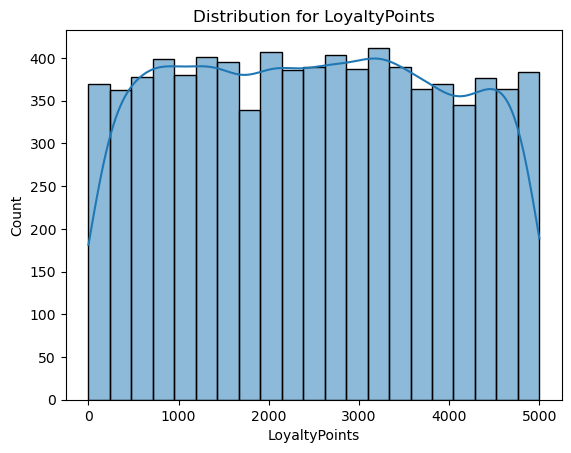

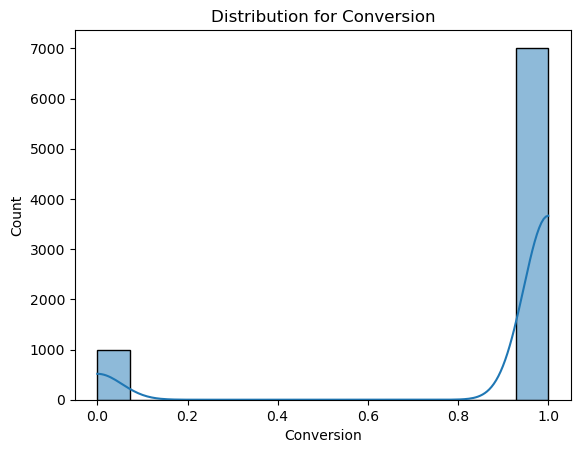

In [551]:
for column in df.columns:
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

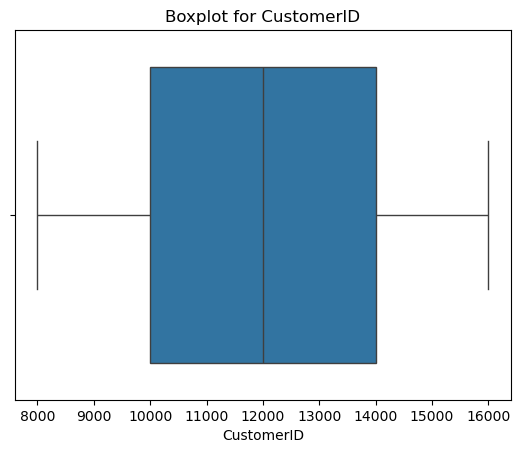

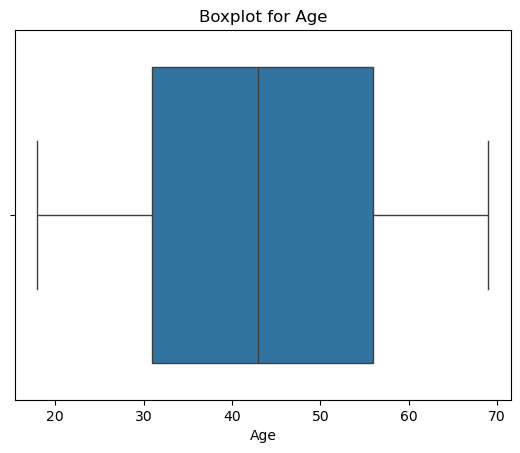

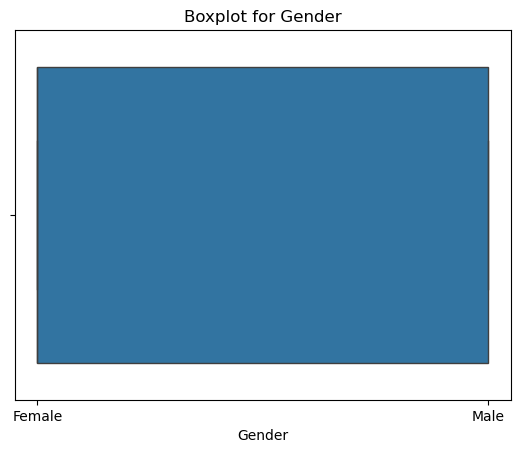

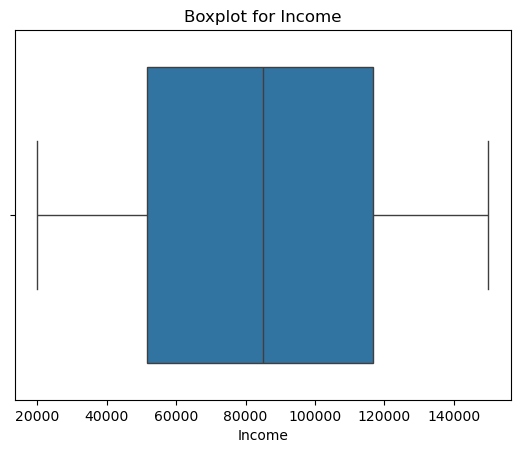

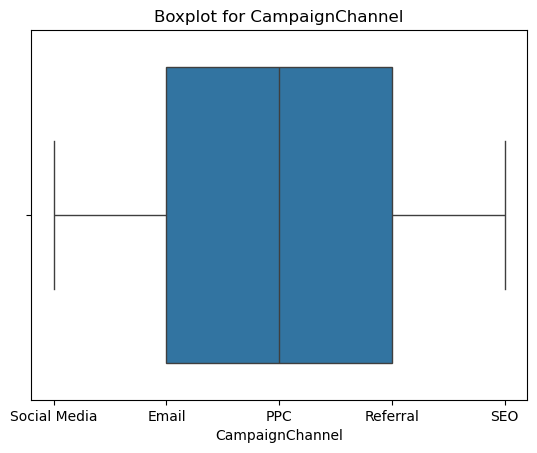

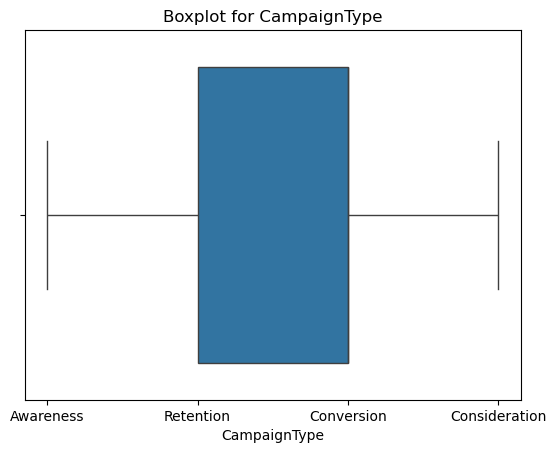

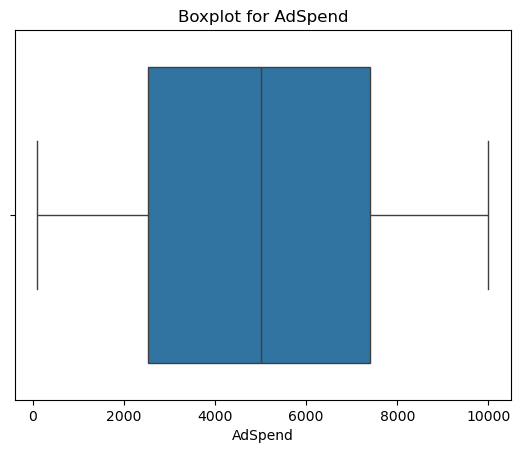

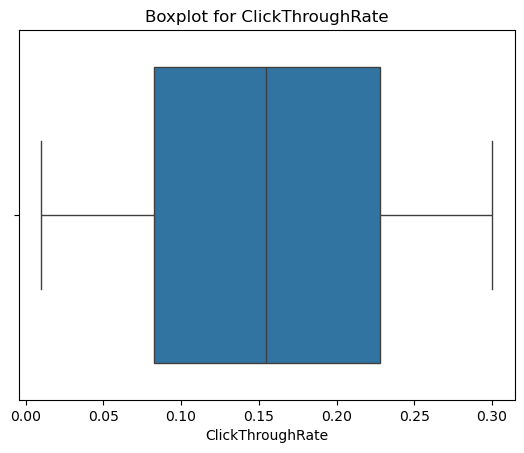

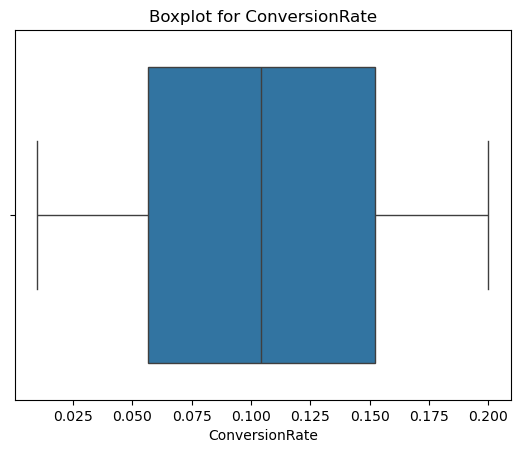

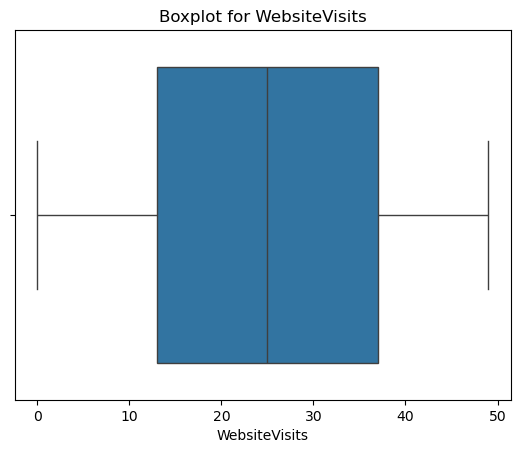

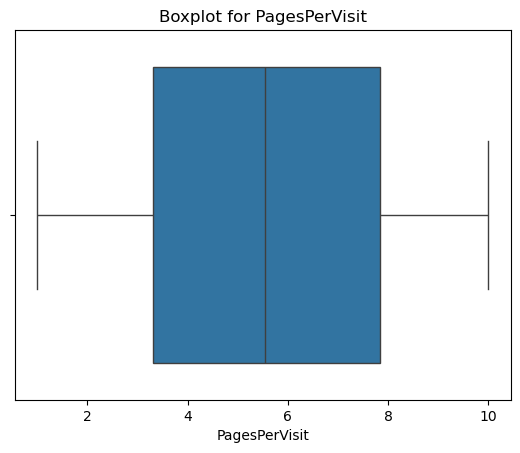

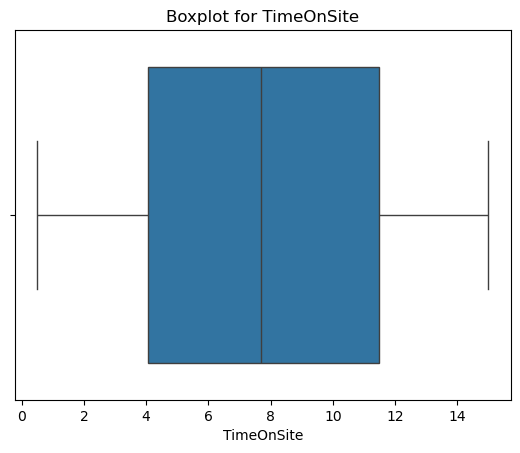

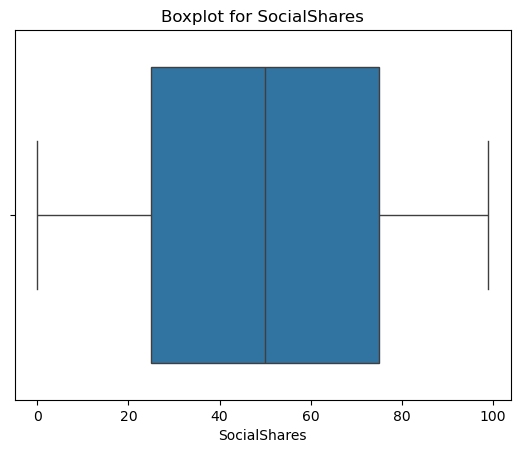

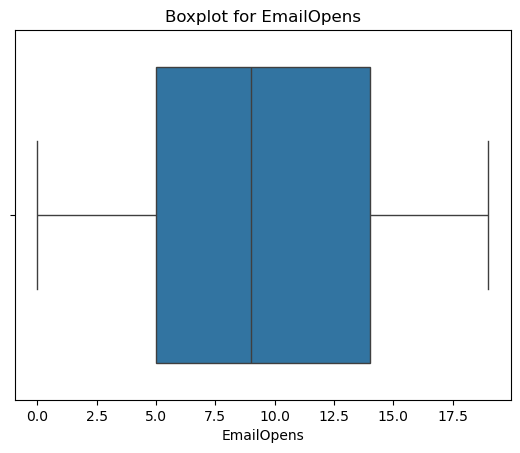

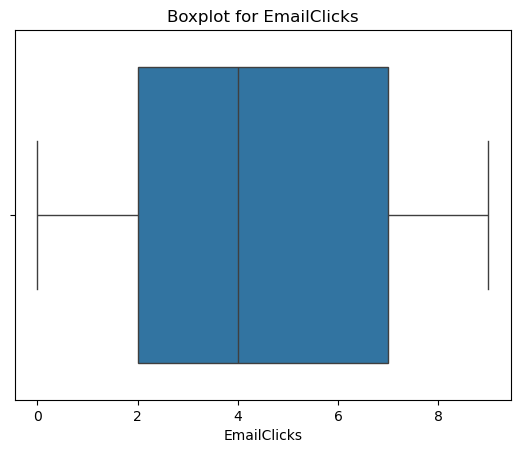

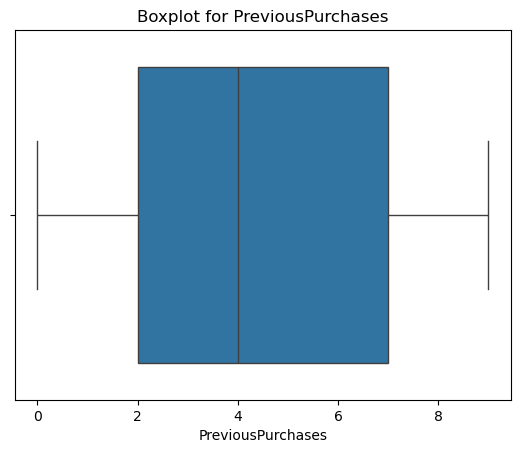

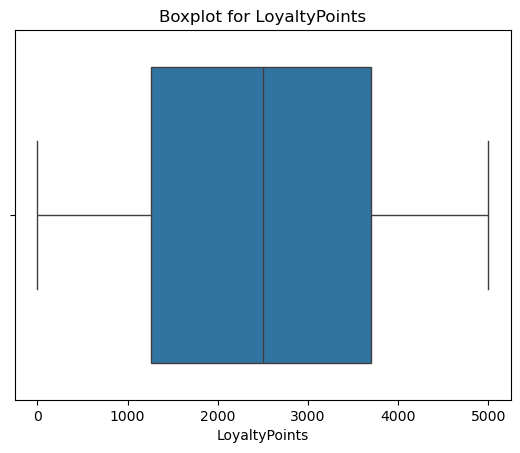

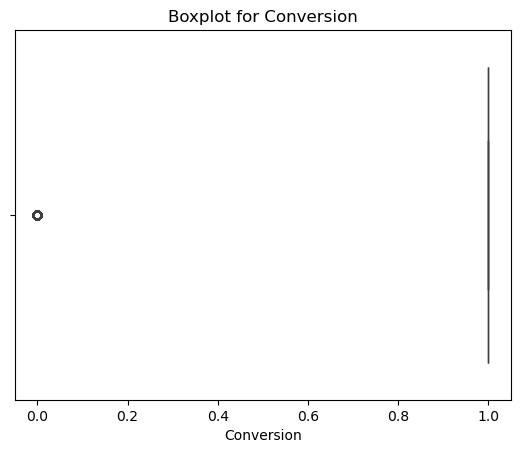

In [552]:
for column in df.columns:
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

<h2>Exploratory analysis</h2>

Questions to answer:
<h4>Correlations and relationships between variables</h4> How are advertising expenses (AdSpend) related to conversion (Conversion)?<br> How does customer engagement (WebsiteVisits, TimeOnSite) change with increased advertising expenses?<br>
<h4>Segmentation and user grouping</h4> Which customer groups are more likely to make purchases?<br> Does campaign type (CampaignType) affect conversion across different age groups?<br> What is the average spending (AdSpend) for each customer segment?<br>
<h4>Email marketing effectiveness</h4> Which age groups open email campaigns (EmailOpens) more frequently?<br> Does the type of marketing campaign (CampaignType) influence email click rates (EmailClicks)?<br> How many email openings (EmailOpens) lead to conversion?<br>
<h4>Evaluation of marketing strategy effectiveness</h4> Which marketing channels (CampaignChannel) demonstrate the highest efficiency?<br> Which campaigns attract new customers, and which are more effective for retention?<br>
<h4>Conversion funnel</h4> Which advertising campaigns (CampaignType) drive the most traffic to the website?<br> Which marketing channels (CampaignChannel) generate the highest website traffic?<br> What percentage of visitors (WebsiteVisits) view more than one page (PagesPerVisit)?<br> How does time spent on the site (TimeOnSite) affect the likelihood of conversion?<br> Which advertising campaigns (CampaignType) contribute to longer site visits?<br> Which marketing channels (CampaignChannel) encourage users to spend more time on the website?<br> Which advertising campaigns (CampaignType) lead to more page views?<br> Which marketing channels (CampaignChannel) result in higher page views?<br> How does the number of website visits affect conversion?<br> Visualization of the conversion funnel<br> Which factors are most important for conversion?<br>

In [555]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


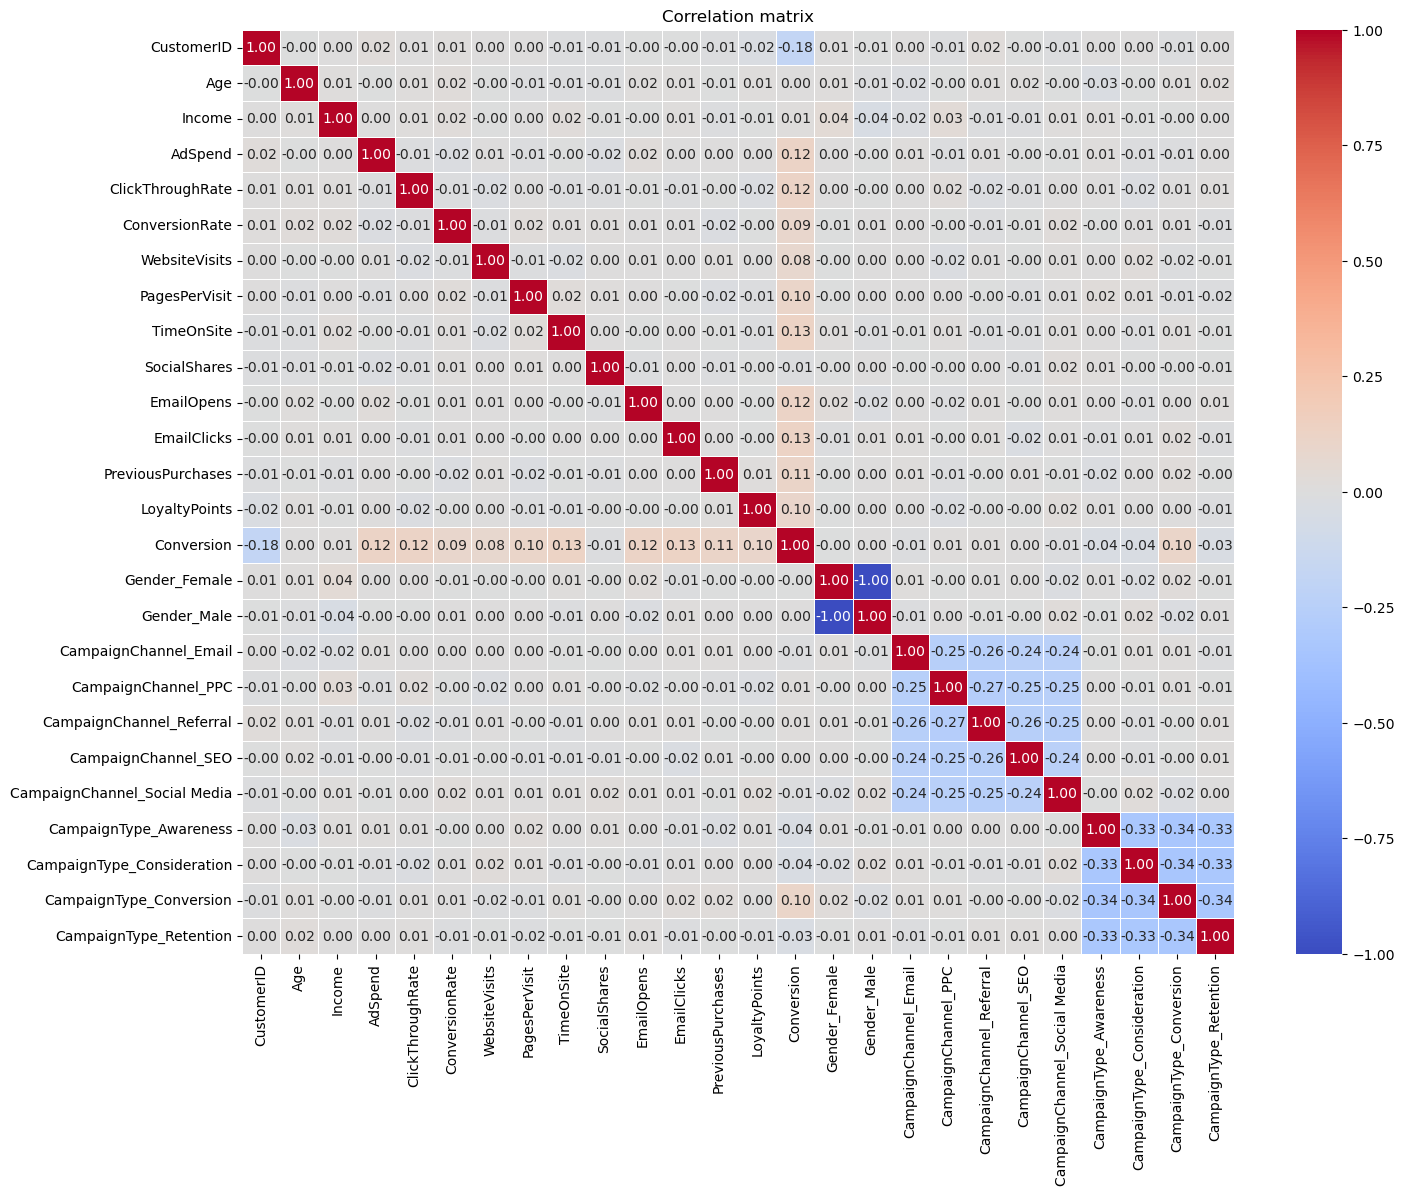

In [556]:
df_numeric = pd.get_dummies(df, drop_first=False)
corr_matrix = df_numeric.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

How are advertising expenses (AdSpend) related to conversion (Conversion)?

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/4283026523.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('AdSpendGroup')['Conversion'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/4283026523.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AdSpendGroup', y='Conversion', data=grouped_data, palette='coolwarm')


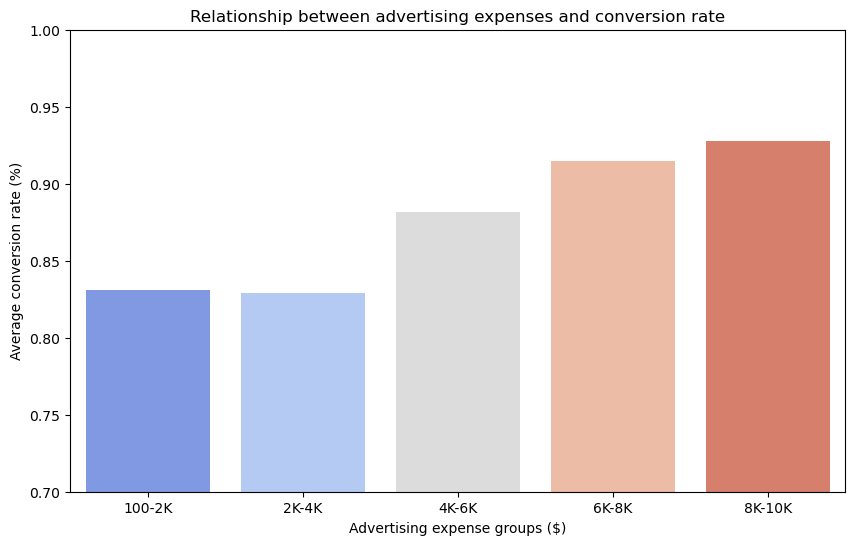

In [558]:
bins = [100, 2000, 4000, 6000, 8000, 10000]
labels = ['100-2K', '2K-4K', '4K-6K', '6K-8K', '8K-10K']
df['AdSpendGroup'] = pd.cut(df['AdSpend'], bins=bins, labels=labels)

grouped_data = df.groupby('AdSpendGroup')['Conversion'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='AdSpendGroup', y='Conversion', data=grouped_data, palette='coolwarm')
plt.xlabel("Advertising expense groups ($)")
plt.ylabel("Average conversion rate (%)")
plt.title("Relationship between advertising expenses and conversion rate")
plt.ylim(0.7, 1)
plt.show()

How does customer engagement (WebsiteVisits, TimeOnSite) change with increased advertising expenses?

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/356601795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('AdSpendGroup')['WebsiteVisits'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/356601795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AdSpendGroup', y='WebsiteVisits', data=grouped_data, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61', '#9C27B0'])


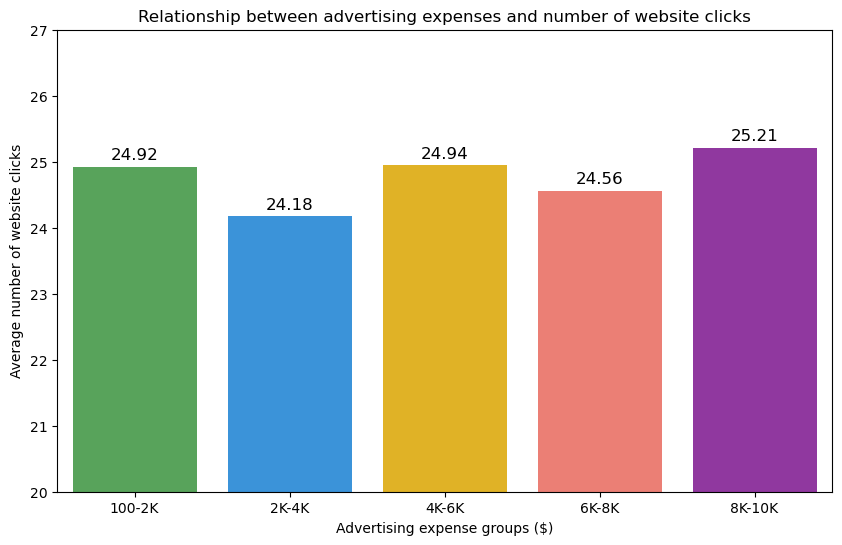

In [560]:
grouped_data = df.groupby('AdSpendGroup')['WebsiteVisits'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AdSpendGroup', y='WebsiteVisits', data=grouped_data, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61', '#9C27B0'])
plt.xlabel("Advertising expense groups ($)")
plt.ylabel("Average number of website clicks")
plt.title("Relationship between advertising expenses and number of website clicks")
plt.ylim(20, 27)
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=3, color='black', fontsize=12)

plt.show()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/1096504721.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('AdSpendGroup')['TimeOnSite'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/1096504721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AdSpendGroup', y='TimeOnSite', data=grouped_data, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61', '#9C27B0'])


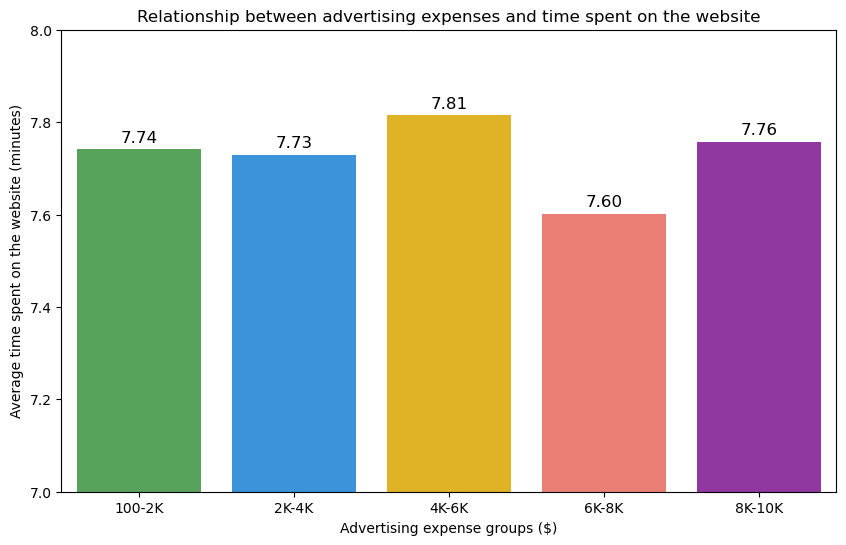

In [561]:
grouped_data = df.groupby('AdSpendGroup')['TimeOnSite'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='AdSpendGroup', y='TimeOnSite', data=grouped_data, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61', '#9C27B0'])
plt.xlabel("Advertising expense groups ($)")
plt.ylabel("Average time spent on the website (minutes)")
plt.title("Relationship between advertising expenses and time spent on the website")

plt.ylim(7, 8)
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type='edge', padding=3, color='black', fontsize=12)

plt.show()

Which customer groups are more likely to make purchases?

In [563]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 70], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
df['IncomeGroup'] = pd.cut(df['Income'], bins=[20000, 50000, 80000, 110000, 150000], labels = ['Low', 'Medium', 'High', 'Very High'])
grouped_df = df.groupby(['Gender', 'AgeGroup', 'IncomeGroup'])['PreviousPurchases'].mean().reset_index()

top_10_groups = grouped_df.sort_values(by='PreviousPurchases', ascending=False).head(10)
bottom_10_groups = grouped_df.sort_values(by='PreviousPurchases', ascending=True).head(10)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/270844897.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Gender', 'AgeGroup', 'IncomeGroup'])['PreviousPurchases'].mean().reset_index()


In [564]:
top_10_groups

,Gender,AgeGroup,IncomeGroup,PreviousPurchases
14,Female,46-55,High,4.869767
16,Female,56+,Low,4.857143
10,Female,36-45,High,4.845494
28,Male,36-45,Low,4.785714
37,Male,56+,Medium,4.756906
29,Male,36-45,Medium,4.739130
4,Female,26-35,Low,4.725962
1,Female,18-25,Medium,4.709091
24,Male,26-35,Low,4.702532
23,Male,18-25,Very High,4.691057


In [566]:
bottom_10_groups

,Gender,AgeGroup,IncomeGroup,PreviousPurchases
0,Female,18-25,Low,3.972028
38,Male,56+,High,4.023697
15,Female,46-55,Very High,4.077739
33,Male,46-55,Medium,4.240260
13,Female,46-55,Medium,4.271845
18,Female,56+,High,4.298361
39,Male,56+,Very High,4.300429
7,Female,26-35,Very High,4.305556
22,Male,18-25,High,4.316832
9,Female,36-45,Medium,4.317391


In [567]:
grouped_df = df.groupby(['Gender', 'AgeGroup', 'IncomeGroup'])['Conversion'].mean().reset_index()

top_10_groups = grouped_df.sort_values(by='Conversion', ascending=False).head(10)
bottom_10_groups = grouped_df.sort_values(by='Conversion', ascending=True).head(10)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/3436979725.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Gender', 'AgeGroup', 'IncomeGroup'])['Conversion'].mean().reset_index()


In [568]:
top_10_groups

,Gender,AgeGroup,IncomeGroup,Conversion
28,Male,36-45,Low,0.935714
29,Male,36-45,Medium,0.934783
9,Female,36-45,Medium,0.913043
11,Female,36-45,Very High,0.906250
26,Male,26-35,High,0.905109
31,Male,36-45,Very High,0.902174
30,Male,36-45,High,0.895105
18,Female,56+,High,0.895082
37,Male,56+,Medium,0.895028
27,Male,26-35,Very High,0.890710


In [569]:
bottom_10_groups

,Gender,AgeGroup,IncomeGroup,Conversion
22,Male,18-25,High,0.792079
33,Male,46-55,Medium,0.818182
1,Female,18-25,Medium,0.842424
35,Male,46-55,Very High,0.843373
4,Female,26-35,Low,0.846154
38,Male,56+,High,0.848341
0,Female,18-25,Low,0.860140
32,Male,46-55,Low,0.860606
24,Male,26-35,Low,0.860759
7,Female,26-35,Very High,0.861111


/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/2636020496.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values=['PreviousPurchases', 'Conversion'], index=['AgeGroup', 'IncomeGroup'], columns=['Gender'])


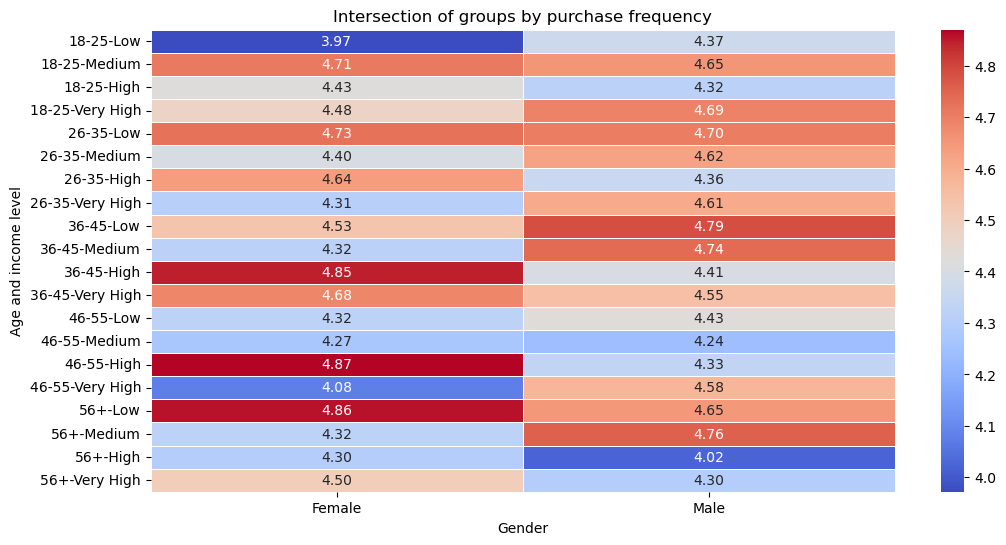

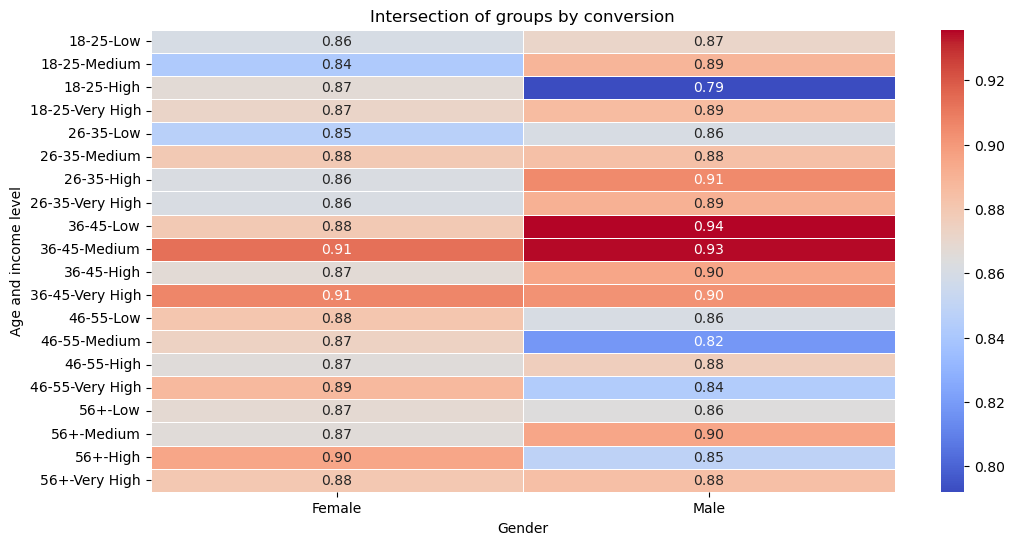

In [570]:
pivot_table = df.pivot_table(values=['PreviousPurchases', 'Conversion'], index=['AgeGroup', 'IncomeGroup'], columns=['Gender'])

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table['PreviousPurchases'], annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Intersection of groups by purchase frequency")
plt.xlabel("Gender")
plt.ylabel("Age and income level")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table['Conversion'], annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Intersection of groups by conversion")
plt.xlabel("Gender")
plt.ylabel("Age and income level")
plt.show()

<h4>1. Conversion by age and income</h4> The highest conversion rate is observed in the 36-45 age group, especially among men with low and medium income levels (0.935 and 0.934). Women aged 36-45 with high income also show a high conversion rate (0.906). The lowest conversion rate is seen among men aged 18-25 with high income (0.792), which may indicate low engagement or longer decision-making times in this group.
<h4>2. Average number of previous purchases</h4> Men aged 36-45 with low income make purchases most frequently (4.79). Women aged 56+ with low income (4.85) also exhibit high purchasing activity, possibly due to stable product needs. The lowest average number of purchases is seen among men aged 56+ with high income (4.02), which may suggest fewer but larger transactions.
<h4>3. Gender differences in purchasing behavior</h4> Men aged 36-45 with low income are the most active buyers. Women aged 56+ make purchases consistently, regardless of income level. Women aged 18-25 with medium income make more purchases (4.7) than men (4.65), which may indicate a preference for frequent purchases.
<h4>4. Income impact</h4> Medium income often demonstrates a higher conversion rate than high income (e.g., among 36-45-year-olds). High income does not always lead to more frequent purchases—groups with high income tend to shop less often.
<h4>Business conclusions:</h4>
The primary buyers are men aged 36-45 with low income and women aged 56+ with low income.
Marketing campaigns for high conversion rates should target men aged 36-45 and women aged 56+.
Personalization strategies can help improve engagement and purchasing behavior among men aged 56+.
Women aged 18-25 with medium income tend to shop frequently, making them a strong target for subscription-based services.
<h4>Most efficient groups (high purchases + high conversion)</h4> men aged 36-45 with low income (0.935 conversion, 4.79 purchases) — highest conversion rate, frequent buyers. women aged 36-45 with medium income (0.913 conversion, 4.31 purchases) — high conversion, stable purchasing behavior. men aged 26-35 with high income (0.905 conversion, 4.35 purchases) — strong conversion rate, relatively active buyers. women aged 56+ with low income (0.867 conversion, 4.85 purchases) — frequent shoppers, despite lower income, strong conversion. women aged 36-45 with high income (0.906 conversion, 4.84 purchases) — stable and active buyers.
<h4>Least efficient groups (low purchases + low conversion)</h4> men aged 18-25 with high income (0.792 conversion, 4.31 purchases) — low conversion, infrequent purchases. women aged 46-55 with high income (0.865 conversion, 4.87 purchases) — frequent purchases, but lower conversion rate. men aged 56+ with high income (0.848 conversion, 4.02 purchases) — lowest purchase frequency. women aged 18-25 with low income (0.860 conversion, 3.97 purchases) — low purchasing volume. men aged 46-55 with medium income (0.818 conversion, 4.24 purchases) — low engagement levels.
<h4>Business conclusions:</h4> focus on men aged 36-45 with low income, as they lead in purchases and conversions. women aged 56+ with low income are stable buyers, making them a valuable audience for mass-market products. men aged 18-25 with high income may require adjusted marketing strategies to better engage them. men aged 56+ with high income could be targeted for larger one-time purchases.

<br>

Does the campaign type (CampaignType) affect conversion across different age groups?

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/1876055778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['AgeGroup', 'CampaignType'])['Conversion'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/1876055778.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.barplot(x='AgeGroup', y='Conversion', hue='CampaignType', data=df, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61', '#9C27B0'])


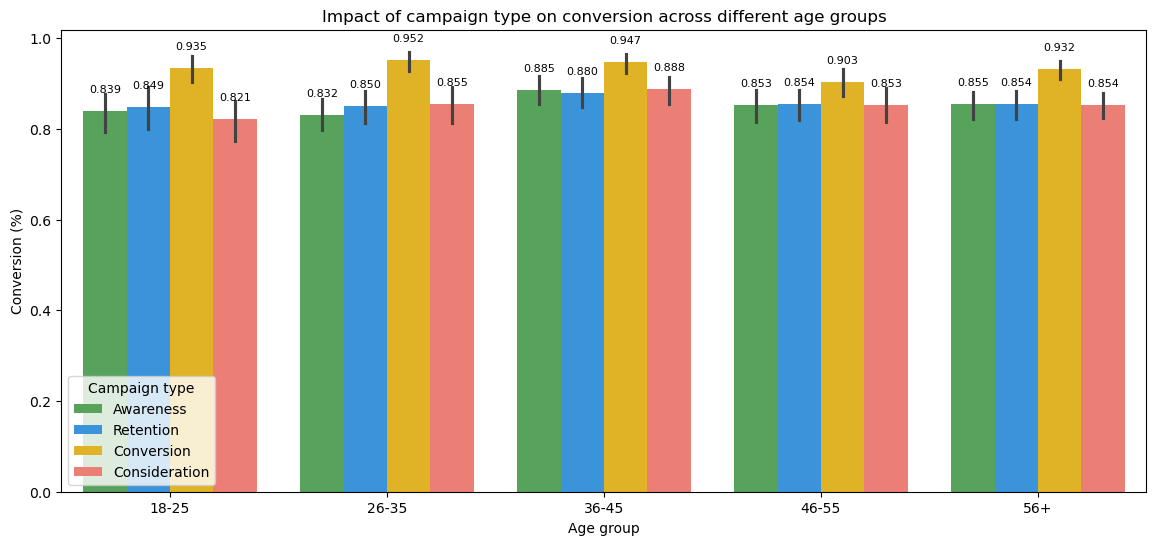

In [576]:
grouped_df = df.groupby(['AgeGroup', 'CampaignType'])['Conversion'].mean().reset_index()
grouped_df.sort_values(by='Conversion', ascending=False)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='AgeGroup', y='Conversion', hue='CampaignType', data=df, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61', '#9C27B0'])

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=12, color='black', fontsize=8)

plt.xlabel("Age group")
plt.ylabel("Conversion (%)")
plt.title("Impact of campaign type on conversion across different age groups")
plt.legend(title="Campaign type")
plt.show()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/3952508184.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['AgeGroup', 'CampaignChannel'])['Conversion'].mean().reset_index()


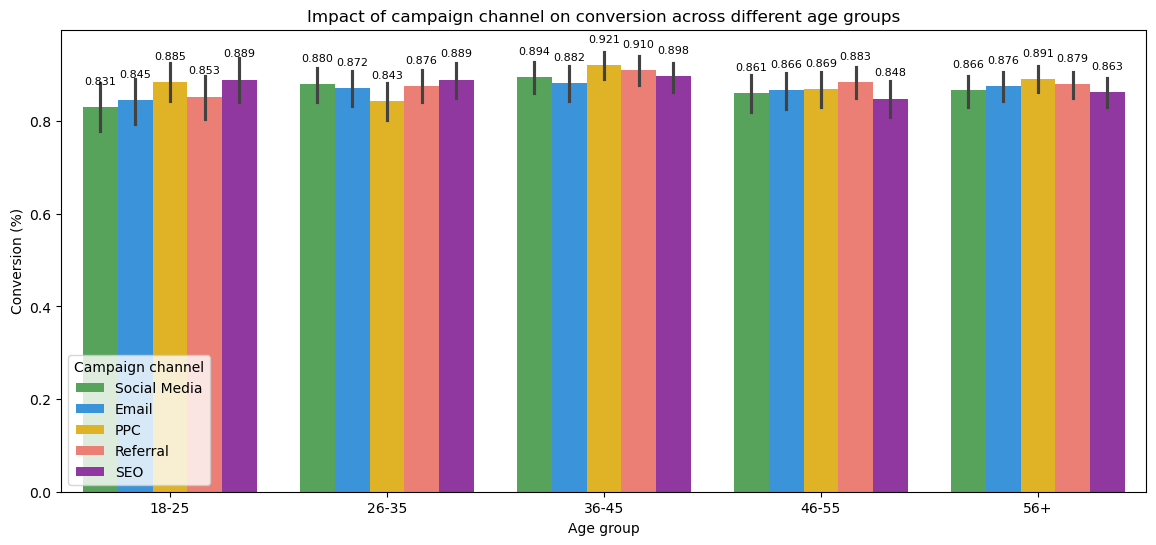

In [577]:
grouped_df = df.groupby(['AgeGroup', 'CampaignChannel'])['Conversion'].mean().reset_index()
grouped_df.sort_values(by='Conversion', ascending=False)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='AgeGroup', y='Conversion', hue='CampaignChannel', data=df, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61', '#9C27B0'])

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=15, color='black', fontsize=8)

plt.xlabel("Age group")
plt.ylabel("Conversion (%)")
plt.title("Impact of campaign channel on conversion across different age groups")
plt.legend(title="Campaign channel")

plt.show()

<h4>Most effective combinations (high conversion):</h4>
PPC (Pay-Per-Click Advertising) in the 36-45 age group (0.921)<br> This group shows the highest conversion rate among all channels.<br> PPC performs well for this age category, likely due to their tendency for targeted purchases.<br> Referral marketing in the 36-45 age group (0.910)<br> A high conversion rate suggests strong trust in recommendations, especially among people in this age bracket.<br> SEO (Search Engine Optimization) in the 36-45 age group (0.898)<br> This indicates that organic search plays a key role in their purchasing decisions.<br> PPC in the 56+ age group (0.890)<br> Paid ads are also effective for older audiences, likely because they prefer direct messaging and are ready to take action.<br> SEO in the 18-25 age group (0.889)<br> Young consumers frequently rely on search engines when choosing products or services.<br>
<h4>Least effective combinations (low conversion):</h4> Social Media for the 18-25 age group (0.831)<br> Despite high social media usage, conversion rates are lower than other channels.<br> Young users may engage with content but take longer to make purchasing decisions.<br> PPC for the 26-35 age group (0.843)<br> The conversion rate is lower than in other age categories, possibly indicating a more rational approach to purchases.<br> Email marketing in the 18-25 age group (0.844)<br> Younger consumers are less responsive to email campaigns, as their attention is often focused on other channels.<br> SEO for the 46-55 age group (0.848)<br> Search is less effective at converting buyers in this age bracket, possibly because they rely more on recommendations.<br> Referral marketing for the 18-25 age group (0.853)<br> Recommendations are less influential among young consumers, likely because they prefer independent research and comparisons.<br>
<h4>General conclusions:</h4>
Best channels: PPC and referral marketing for the 36-45 age group.<br>
SEO delivers good results for younger consumers (18-25 years old).<br>
Social media works well for engagement but does not lead to high conversions.<br>
Email is effective for older demographics but weaker for younger segments.<br>
<h4>Strategy optimization:</h4> ✔ Strengthen PPC for 36-45 and 56+ years.<br> ✔ Increase trust-based marketing (Referral) for middle-age segments.<br> ✔ Reassess Social Media and Email marketing for younger consumers.<br>

<h4>Most effective campaign types (high conversion):</h4> Conversion campaigns yield the best results across all age groups.<br> The highest conversion rate is observed in the 26-35 age group (0.951), indicating their readiness to make purchases.<br> 36-45 years (0.946) also exhibit strong conversion rates, confirming their decisiveness.<br> 18-25 years (0.935) show high conversion, likely due to their impulse-driven purchasing behavior.<br> 56+ years (0.931) respond well to conversion-focused campaigns, demonstrating a willingness to act.<br>
<h4>Less effective campaigns (low conversion):</h4> Awareness campaigns show the lowest conversion rates, particularly in the 18-25 age group (0.838).<br> This suggests that brand-awareness-focused efforts do not immediately lead to purchases.<br> 26-35 years (0.831) also show low conversion, possibly due to insufficient motivation to take action.<br> Consideration campaigns similarly yield lower conversion rates, especially for the 18-25 group (0.821).<br> This may indicate that young consumers tend to explore options but delay decision-making.<br>
<h4>Other insights:</h4> Retention campaigns are most effective for 36-45 and 56+ years, confirming that loyal older customers respond well to retention-focused strategies.<br> Consideration and awareness campaigns play an important role for 46-55 and 56+ years, possibly because they make more thoughtful decisions and require additional information.<br>
<h4>Business conclusions:</h4>
Prioritize conversion campaigns, especially for the 26-35 and 36-45 age groups.<br>
Awareness campaigns are less effective for younger consumers—direct offers or promotions may work better.<br>
Retention strategies are crucial for consumers aged 36+, as loyalty campaigns drive engagement.<br>
Optimizing consideration campaigns for the 18-25 age group through interactive and personalized offers could improve performance.<br>

What is the average advertising spend (AdSpend) for each customer segment?<br>

In [590]:
avg_ad_spend = df.groupby(['Gender', 'AgeGroup', 'IncomeGroup'])['AdSpend'].mean().reset_index()
avg_ad_spend = avg_ad_spend.sort_values(by='AdSpend', ascending=False)

avg_ad_spend.head(5)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/2841502055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ad_spend = df.groupby(['Gender', 'AgeGroup', 'IncomeGroup'])['AdSpend'].mean().reset_index()


,Gender,AgeGroup,IncomeGroup,AdSpend
22,Male,18-25,High,5436.881631
4,Female,26-35,Low,5424.542116
20,Male,18-25,Low,5388.525293
24,Male,26-35,Low,5337.734579
9,Female,36-45,Medium,5299.330935


In [593]:
avg_ad_spend.tail(5)

,Gender,AgeGroup,IncomeGroup,AdSpend
18,Female,56+,High,4779.197470
12,Female,46-55,Low,4745.416904
37,Male,56+,Medium,4741.535916
3,Female,18-25,Very High,4593.637646
1,Female,18-25,Medium,4438.523145


<h4>Most efficient groups (high conversion with reasonable expenses):</h4> Men aged 36-45 (low and medium income) — 0.935 and 0.934 High conversion with moderate advertising expenses (not among the top spenders). These groups respond well to marketing campaigns, making them worth retaining.<br>
Women aged 36-45 (very high income) — 0.906 Excellent conversion rate, despite advertising expenses not being among the highest, making this group attractive from an investment perspective.<br>
Men aged 26-35 (high and very high income) — 0.905 and 0.890 A good balance between conversion and advertising expenses.<br>
Women aged 56+ (high income) — 0.895 High conversion but moderate expenses. This segment can yield stable profits with relatively low ad spending.<br>
<h4>Least efficient groups (low conversion with high expenses):</h4> Men aged 18-25 (high income) — 0.792, but AdSpend = 5436 High advertising expenses but lowest conversion rate among all groups. This strategy needs reconsideration, as it may be inefficient.<br>
Women aged 26-35 (low income) — 0.846, but AdSpend = 5424 Moderate conversion but very high advertising costs, making this segment less profitable.<br>
Men aged 18-25 (low income) — 0.860, but AdSpend = 5388 Similar to the previous case, above-average spending but unimpressive conversion.<br>
Women aged 36-45 (medium income) — 0.913, but AdSpend = 5299 Despite high conversion, advertising costs are also high. The strategy should be optimized to reduce expenses without losing effectiveness.<br>

Which age groups open email campaigns (EmailOpens) more frequently?<br>

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/3378274548.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_opens_by_age = df.groupby("AgeGroup")["EmailOpens"].mean().sort_values(ascending=False)


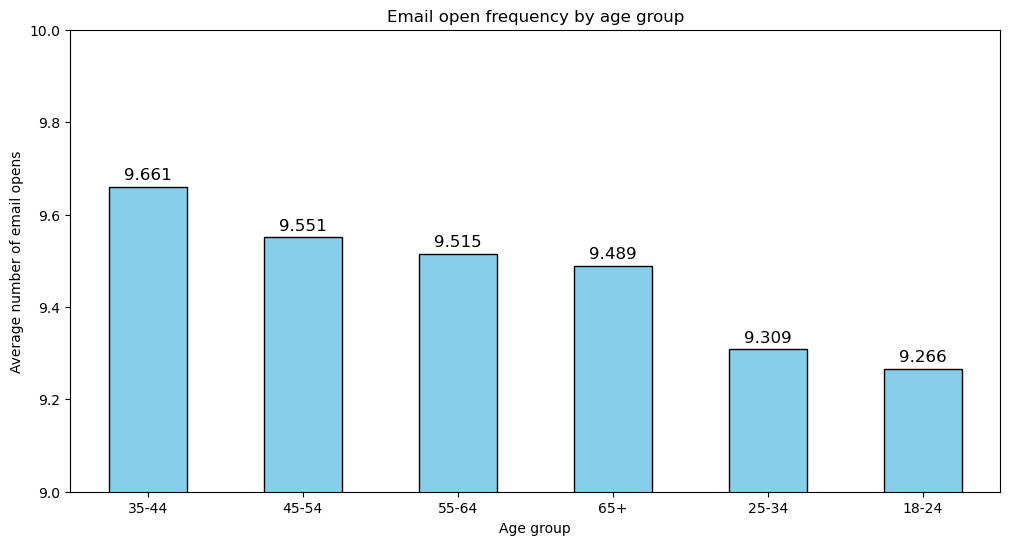

In [597]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

email_opens_by_age = df.groupby("AgeGroup")["EmailOpens"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = email_opens_by_age.plot(kind="bar", color="skyblue", edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Age group")
plt.ylabel("Average number of email opens")
plt.title("Email open frequency by age group")
plt.xticks(rotation=0)
plt.ylim(9, 10)
plt.show()

Does the type of marketing campaign (CampaignType) affect the email click-through rate (EmailClicks)?

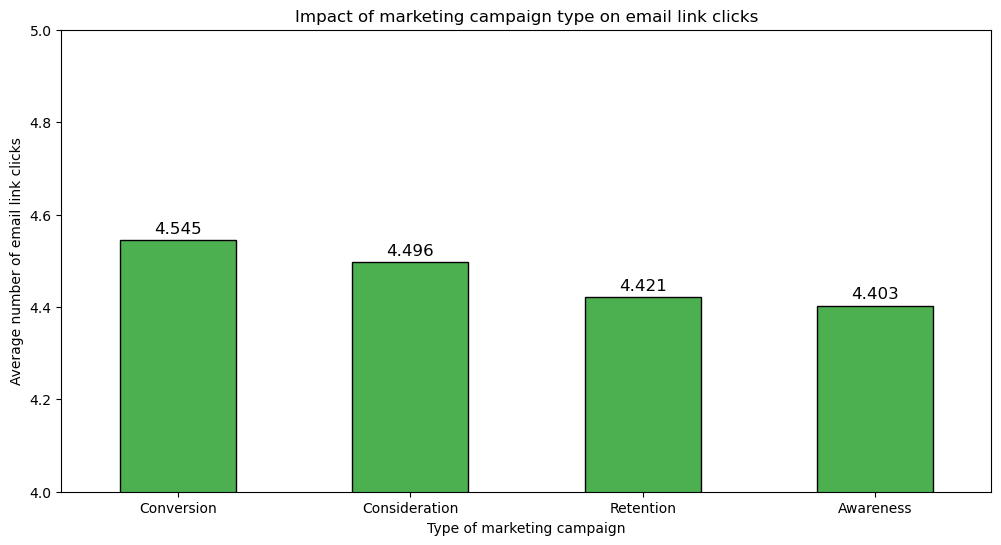

In [600]:
email_clicks_by_campaign_type = df.groupby("CampaignType")["EmailClicks"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = email_clicks_by_campaign_type.plot(kind="bar", color="#4CAF50", edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Type of marketing campaign")
plt.ylabel("Average number of email link clicks")
plt.title("Impact of marketing campaign type on email link clicks")
plt.xticks(rotation=0)
plt.ylim(4, 5)
plt.show()

How many email opens (EmailOpens) lead to conversions?<br>

In [605]:
converted_df = df[df["Conversion"] == 1]
average_email_opens = converted_df["EmailOpens"].mean()
average_email_opens

9.744580718767827

Which marketing channels (CampaignChannel) demonstrate the best effectiveness?

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_13099/1609171232.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CampaignChannel', y='Efficiency', data=grouped_df_sorted, palette='coolwarm', order=grouped_df_sorted['CampaignChannel'])


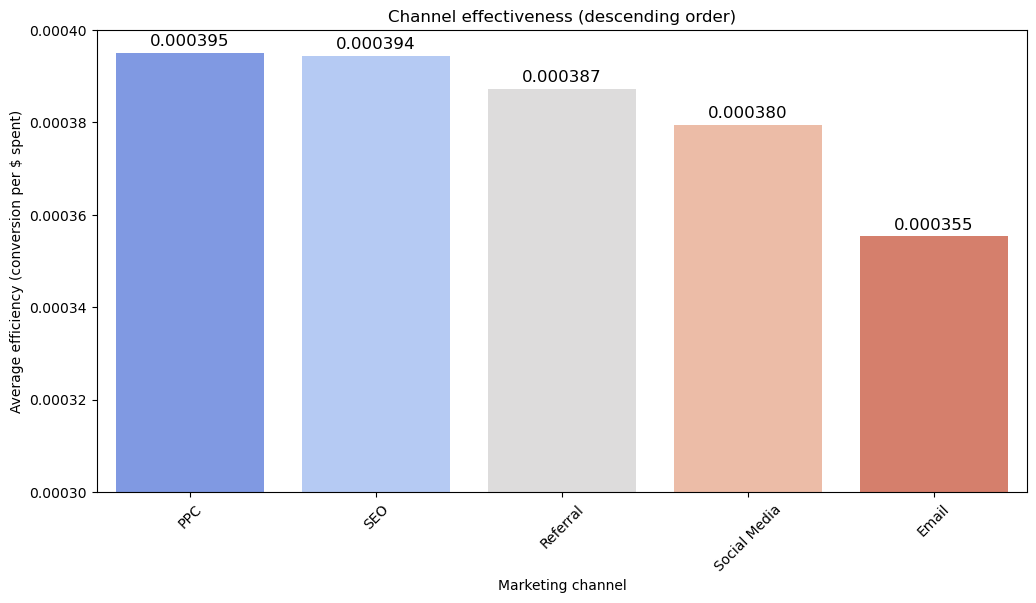

In [609]:
df['Efficiency'] = df['Conversion'] / df['AdSpend']
grouped_df = df.groupby(['CampaignChannel'])['Efficiency'].mean().reset_index()
grouped_df_sorted = grouped_df.sort_values(by='Efficiency', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='CampaignChannel', y='Efficiency', data=grouped_df_sorted, palette='coolwarm', order=grouped_df_sorted['CampaignChannel'])

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.6f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Marketing channel")
plt.ylabel("Average efficiency (conversion per $ spent)")
plt.title("Channel effectiveness (descending order)")
plt.xticks(rotation=45)
plt.ylim(0.0003, 0.0004)
plt.show()

Which campaigns attract new customers, and which are better for retention?<br>

In [612]:
df["new_customer_ratio"] = df["ClickThroughRate"] * df["ConversionRate"]
df["retention_ratio"] = df["PreviousPurchases"] + df["LoyaltyPoints"]

new_customer_threshold = df["new_customer_ratio"].median()
retention_threshold = df["retention_ratio"].median()

result_df = df.groupby("CampaignType")[["new_customer_ratio", "retention_ratio"]].mean().reset_index()
result_df

,CampaignType,new_customer_ratio,retention_ratio
0,Awareness,0.016103,2507.114185
1,Consideration,0.015974,2502.758048
2,Conversion,0.016298,2495.562831
3,Retention,0.016117,2473.098100


Thus, Conversion campaigns are ideal for actively attracting new customers.<br> Awareness and Consideration campaigns help gradually engage customers and maintain their long-term interest in the brand.

Which advertising campaigns (CampaignType) generate the most website traffic?

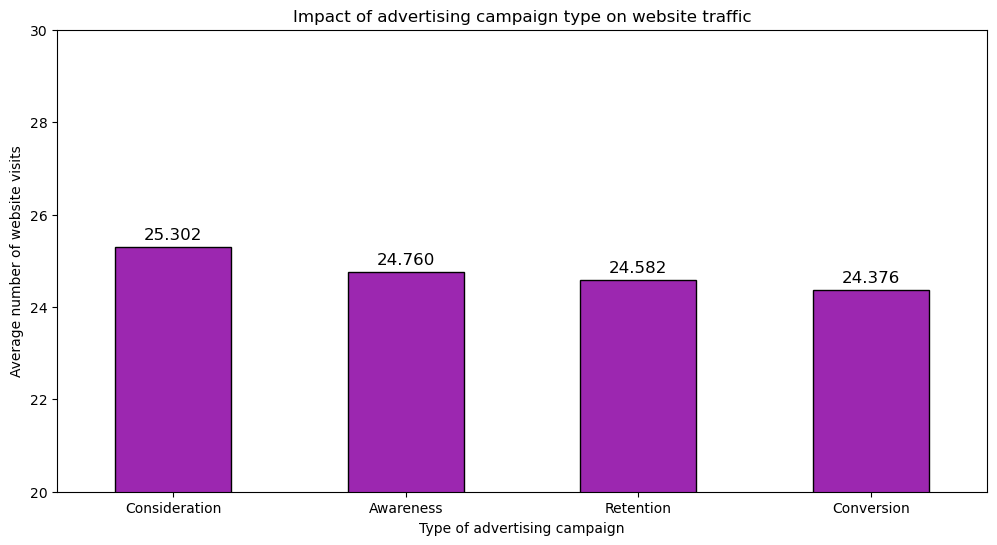

In [616]:
traffic_by_campaign_type = df.groupby("CampaignType")["WebsiteVisits"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = traffic_by_campaign_type.plot(kind="bar", color='#9C27B0', edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Type of advertising campaign")
plt.ylabel("Average number of website visits")
plt.title("Impact of advertising campaign type on website traffic")
plt.xticks(rotation=0)
plt.ylim(20, 30)
plt.show()

Which advertising channels (CampaignChannel) drive the most website traffic?<br>

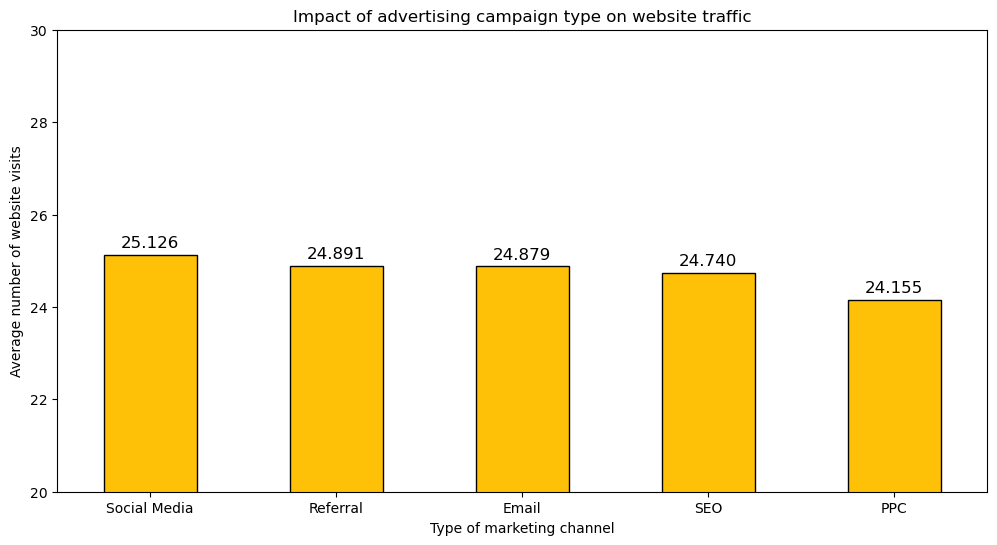

In [619]:
traffic_by_campaign_channel = df.groupby("CampaignChannel")["WebsiteVisits"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = traffic_by_campaign_channel.plot(kind="bar", color='#FFC107', edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Type of marketing channel")
plt.ylabel("Average number of website visits")
plt.title("Impact of advertising campaign type on website traffic")
plt.xticks(rotation=0)
plt.ylim(20, 30)
plt.show()

What percentage of visitors (WebsiteVisits) view more than one page (PagesPerVisit)?<br>

In [622]:
percentage_more_than_one_page = (df[df["PagesPerVisit"] > 1]["WebsiteVisits"].sum() / df["WebsiteVisits"].sum()) * 100
percentage_more_than_one_page

100.0

How does the duration of time spent on a website (TimeOnSite) affect conversion probability?<br>

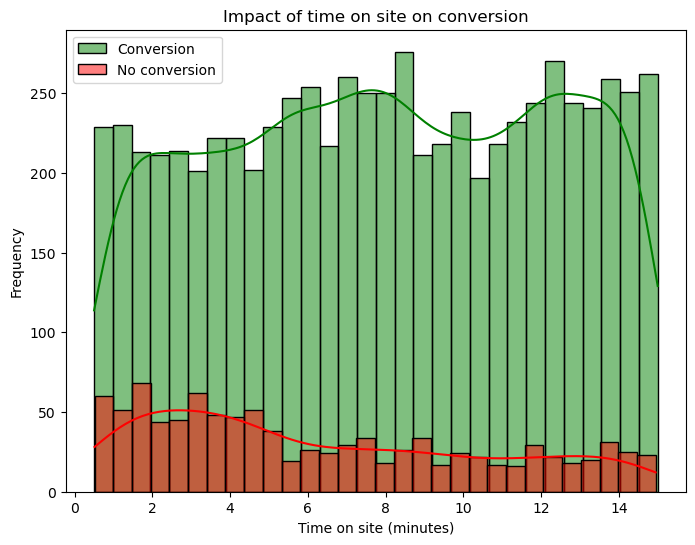

In [625]:
converted = df[df["Conversion"] == 1]["TimeOnSite"]
not_converted = df[df["Conversion"] == 0]["TimeOnSite"]

plt.figure(figsize=(8, 6))
sns.histplot(converted, color="green", label="Conversion", kde=True, bins=30)
sns.histplot(not_converted, color="red", label="No conversion", kde=True, bins=30)
plt.xlabel("Time on site (minutes)")
plt.ylabel("Frequency")
plt.title("Impact of time on site on conversion")
plt.legend()
plt.show()

Which advertising campaigns (CampaignType) contribute to longer time spent on the website?<br>

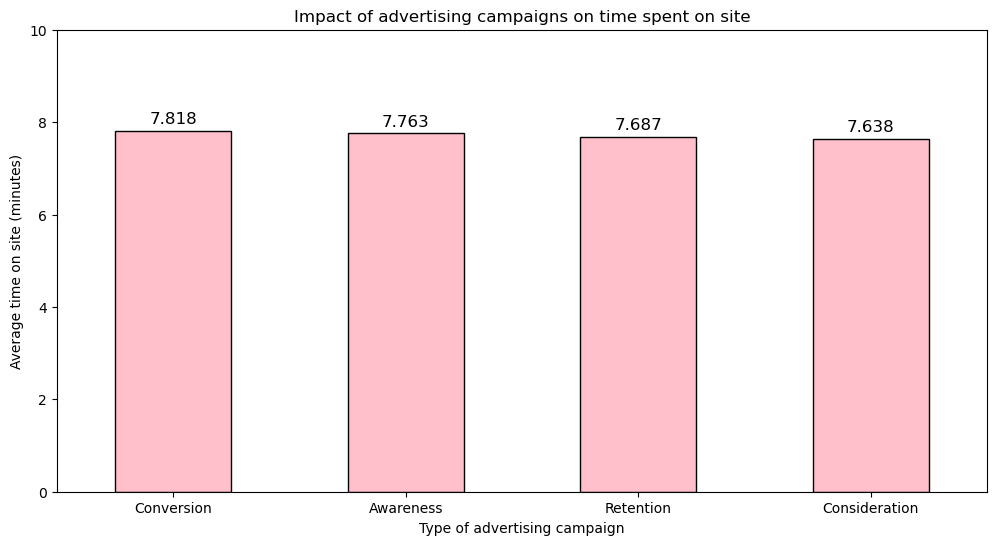

In [628]:
time_by_campaign_type = df.groupby("CampaignType")["TimeOnSite"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = time_by_campaign_type.plot(kind="bar", color='pink', edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Type of advertising campaign")
plt.ylabel("Average time on site (minutes)")
plt.title("Impact of advertising campaigns on time spent on site")

plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.show()

Which advertising channels (CampaignChannel) contribute to longer time spent on the website?<br>

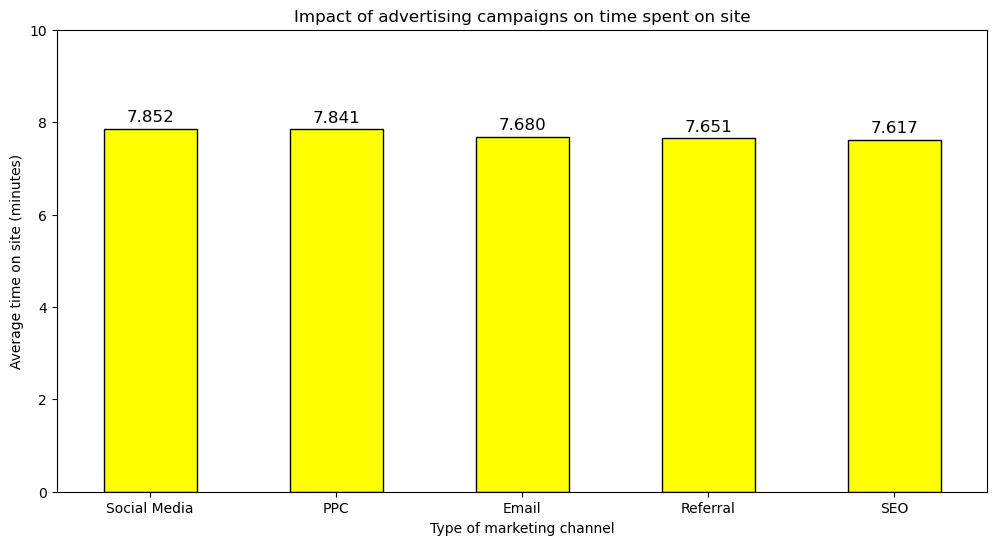

In [631]:
time_by_campaign_channel = df.groupby("CampaignChannel")["TimeOnSite"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = time_by_campaign_channel.plot(kind="bar", color='yellow', edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Type of marketing channel")
plt.ylabel("Average time on site (minutes)")
plt.title("Impact of advertising campaigns on time spent on site")
plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.show()

Which advertising campaigns (CampaignType) contribute to a higher number of page views?<br>

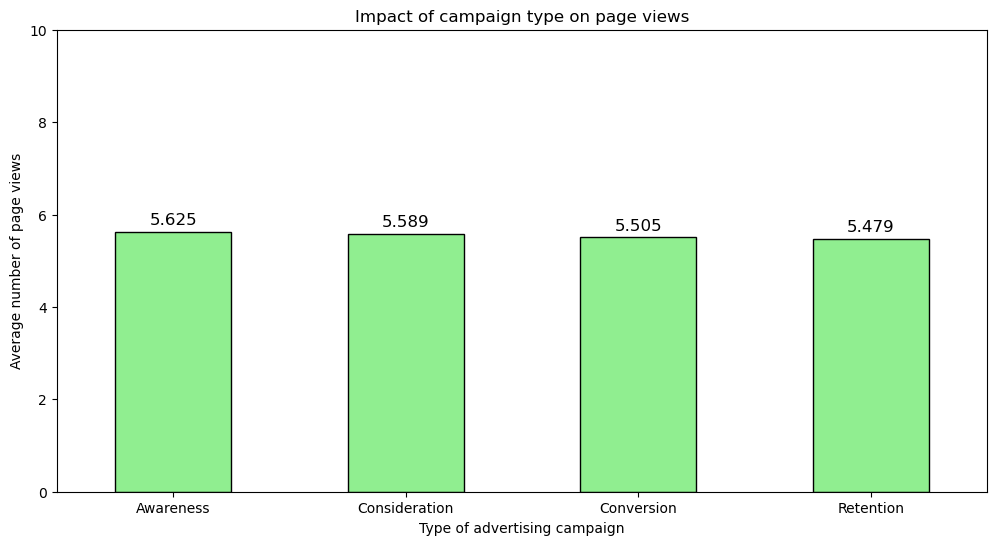

In [634]:
pages_by_campaign_type = df.groupby("CampaignType")["PagesPerVisit"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = pages_by_campaign_type.plot(kind="bar", color='lightgreen', edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Type of advertising campaign")
plt.ylabel("Average number of page views")
plt.title("Impact of campaign type on page views")
plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.show()

Which advertising channels (CampaignChannel) contribute to a higher number of page views?<br>

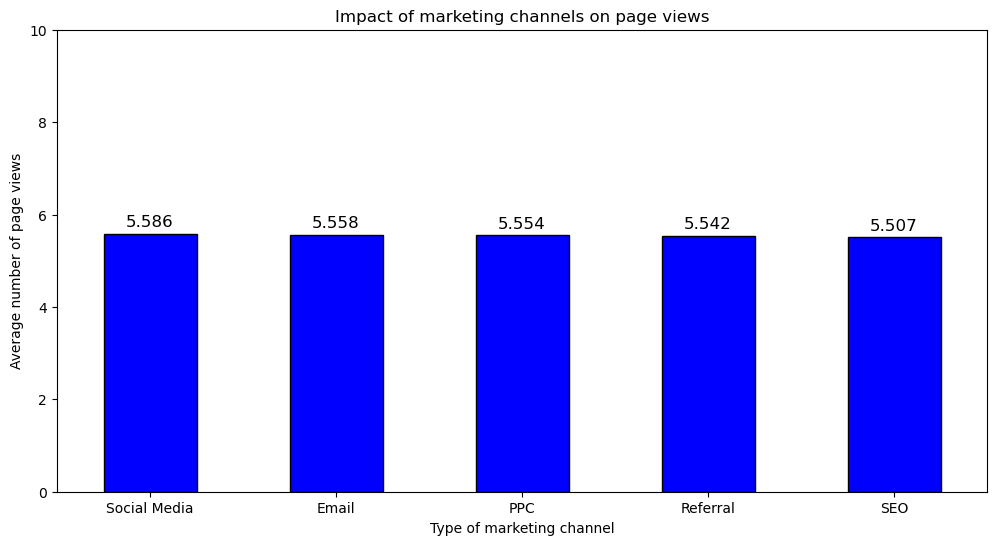

In [637]:
pages_by_campaign_channel = df.groupby("CampaignChannel")["PagesPerVisit"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = pages_by_campaign_channel.plot(kind="bar", color='blue', edgecolor="black")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.3f', label_type='edge', padding=3, color='black', fontsize=12)

plt.xlabel("Type of marketing channel")
plt.ylabel("Average number of page views")
plt.title("Impact of marketing channels on page views")
plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.show()

How does the number of website visits affect conversion?<br>

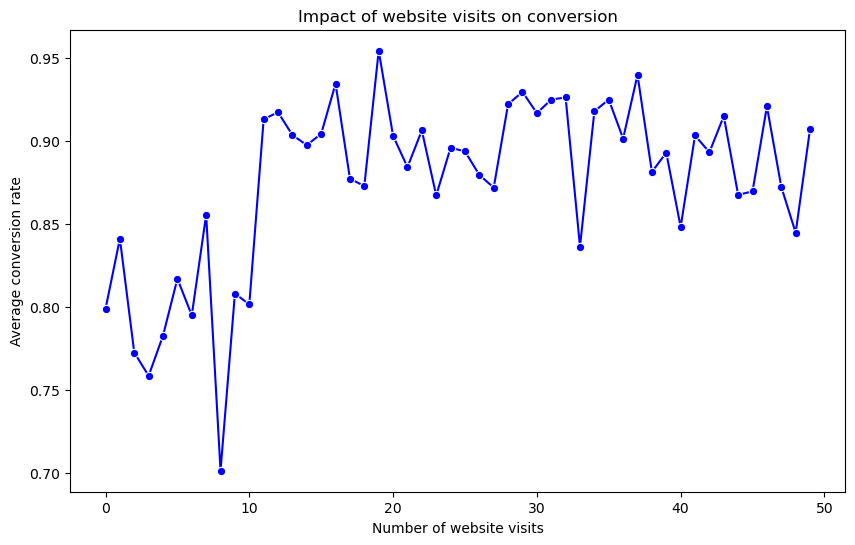

In [640]:
conversion_by_visits = df.groupby("WebsiteVisits")["Conversion"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x="WebsiteVisits", y="Conversion", data=conversion_by_visits, marker="o", color="blue")
plt.xlabel("Number of website visits")
plt.ylabel("Average conversion rate")
plt.title("Impact of website visits on conversion")
plt.show()

Conversion funnel analysis<br>

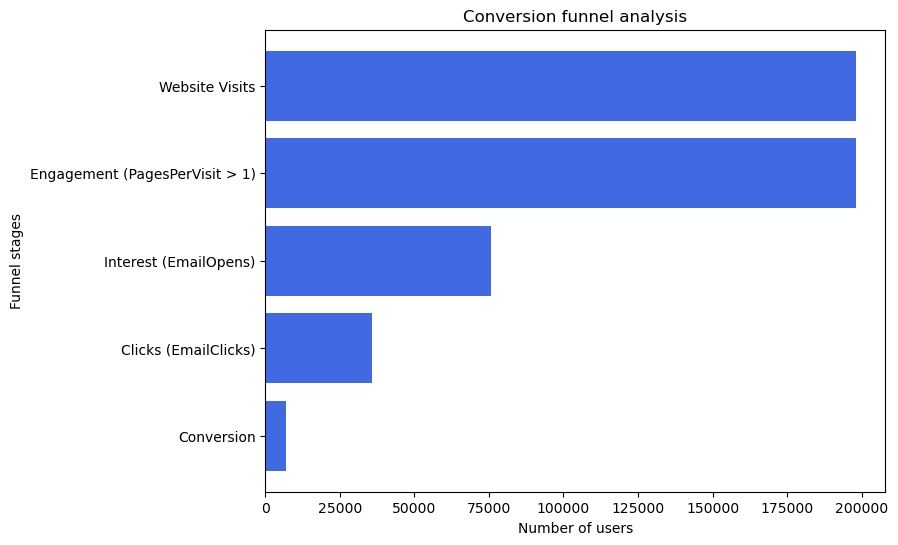

In [643]:
stages = {
    "Website Visits": df["WebsiteVisits"].sum(),
    "Engagement (PagesPerVisit > 1)": df[df["PagesPerVisit"] > 1]["WebsiteVisits"].sum(),
    "Interest (EmailOpens)": df["EmailOpens"].sum(),
    "Clicks (EmailClicks)": df["EmailClicks"].sum(),
    "Conversion": df["Conversion"].sum()
}

funnel_df = pd.DataFrame(list(stages.items()), columns=["Stage", "Users"])

plt.figure(figsize=(8, 6))
plt.barh(funnel_df["Stage"], funnel_df["Users"], color="royalblue")
plt.xlabel("Number of users")
plt.ylabel("Funnel stages")
plt.title("Conversion funnel analysis")
plt.gca().invert_yaxis()
plt.show()

The main issue is the low email open rate. If users don’t open emails, they never reach the click stage, which impacts overall conversions.
Possible reasons for low open rates:<br>
Unattractive subject line – If it doesn’t grab attention, the email remains unopened.<br>
Sending time – If the email arrives at an inconvenient time, users may overlook it.<br>
Trust in the sender – The sender’s address might not inspire confidence, or the email may look like spam.<br>
Email fatigue – If users receive too many emails, yours might get lost in the clutter.<br>
What can be improved:<br>
Test subject lines – Conduct A/B testing to determine which topics attract attention best.<br>
Optimize sending time – Analyze audience activity and send emails at the most convenient hours.<br>
Increase personalization – Emails that feel personal are opened more often. Use recipients’ names, interaction history, and personalized recommendations.<br>
Improve email reputation – Ensure emails come from a recognizable, trustworthy address.<br>
Use intriguing content – Create a sense of value and curiosity in the first sentence.<br>
The issue isn’t just about open rates—it also affects click-through rates. Enhancing the email text, call-to-action (CTA), and design can further improve engagement.<br>

Which factors are most important for conversion?

We encode categorical variables using the One-Hot Encoding method since these variables do not have a natural order.

In [648]:
df = df.drop(columns=['AdSpendGroup', 'AgeGroup', 'IncomeGroup', 'Efficiency', 'new_customer_ratio', 'retention_ratio'])
df = pd.get_dummies(df, columns=['Gender', 'CampaignChannel', 'CampaignType'])
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

We normalize numerical variables to ensure consistency in scale. For variables with a small range, we use Min-Max Scaler. For other data, since they do not follow a normal distribution and contain outliers, we first apply Robust Scaler and then Min-Max Scaler to bring them to a common scale.

In [651]:
scaler = RobustScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income'] = scaler.fit_transform(df[['Income']])
df['AdSpend'] = scaler.fit_transform(df[['AdSpend']])
df['WebsiteVisits'] = scaler.fit_transform(df[['WebsiteVisits']])
df['SocialShares'] = scaler.fit_transform(df[['SocialShares']])
df['LoyaltyPoints'] = scaler.fit_transform(df[['LoyaltyPoints']])

scaler = MinMaxScaler()
df['PagesPerVisit'] = scaler.fit_transform(df[['PagesPerVisit']])
df['TimeOnSite'] = scaler.fit_transform(df[['TimeOnSite']])
df['EmailOpens'] = scaler.fit_transform(df[['EmailOpens']])
df['EmailClicks'] = scaler.fit_transform(df[['EmailClicks']])

df['Age'] = scaler.fit_transform(df[['Age']])
df['Income'] = scaler.fit_transform(df[['Income']])
df['AdSpend'] = scaler.fit_transform(df[['AdSpend']])
df['WebsiteVisits'] = scaler.fit_transform(df[['WebsiteVisits']])
df['SocialShares'] = scaler.fit_transform(df[['SocialShares']])
df['LoyaltyPoints'] = scaler.fit_transform(df[['LoyaltyPoints']])

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.45      0.57       194
           1       0.93      0.98      0.95      1406

    accuracy                           0.92      1600
   macro avg       0.85      0.72      0.76      1600
weighted avg       0.91      0.92      0.91      1600



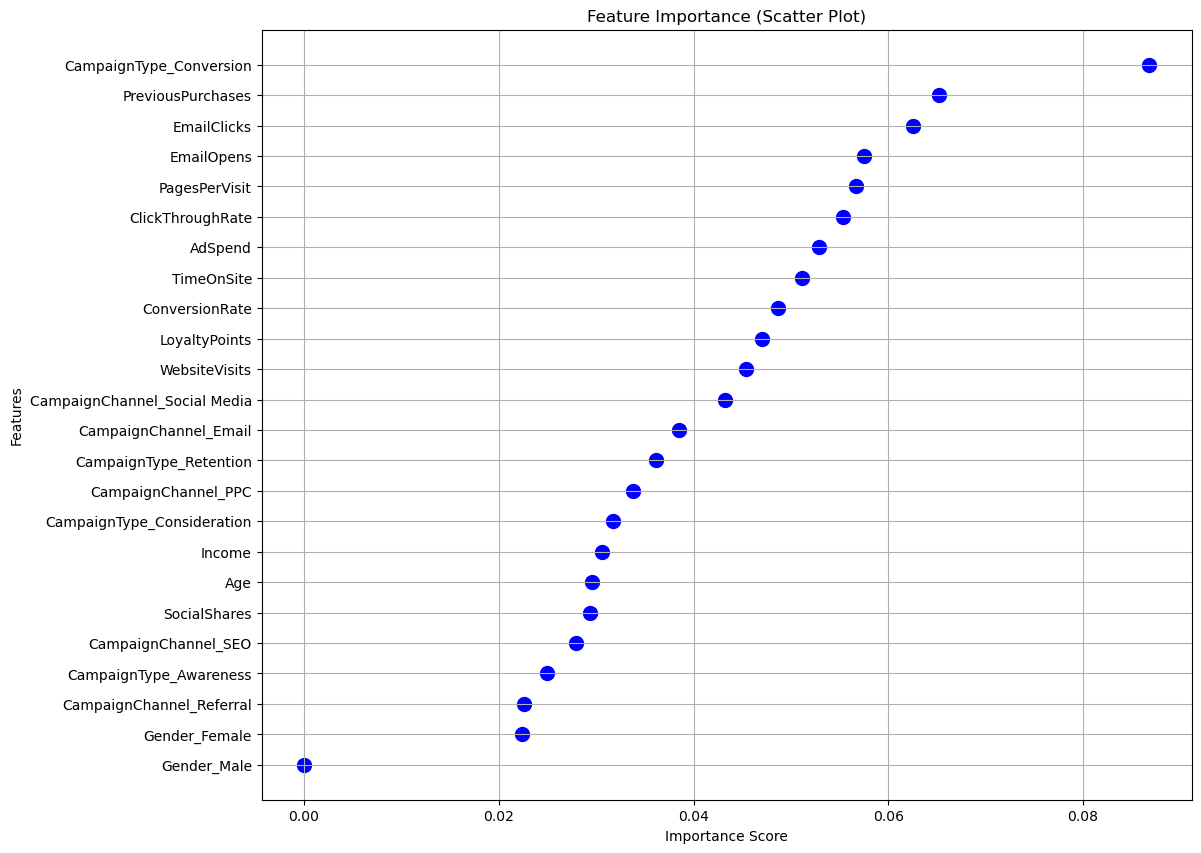

In [653]:
X = df.drop(columns=['Conversion', 'CustomerID'])
y = df['Conversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = model.feature_importances_
features = X.columns

features_sorted = [x for _, x in sorted(zip(feature_importance, features))]
importance_sorted = sorted(feature_importance)

plt.figure(figsize=(12, 10))
plt.scatter(importance_sorted, features_sorted, color='blue', s=100)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Scatter Plot)")
plt.grid()
plt.show()

Optimal threshold: 0.528863


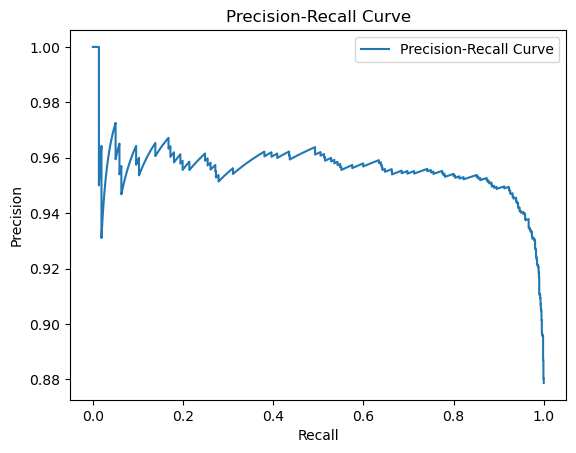

In [654]:
y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores.argmax()]

print("Optimal threshold:", optimal_threshold)

plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [656]:
param_grid = {
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3], 
    "n_estimators": [50, 100, 200], 
    "subsample": [0.8, 1],  
    "colsample_bytree": [0.8, 1]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       194
           1       0.95      0.98      0.96      1406

    accuracy                           0.94      1600
   macro avg       0.89      0.79      0.83      1600
weighted avg       0.93      0.94      0.93      1600



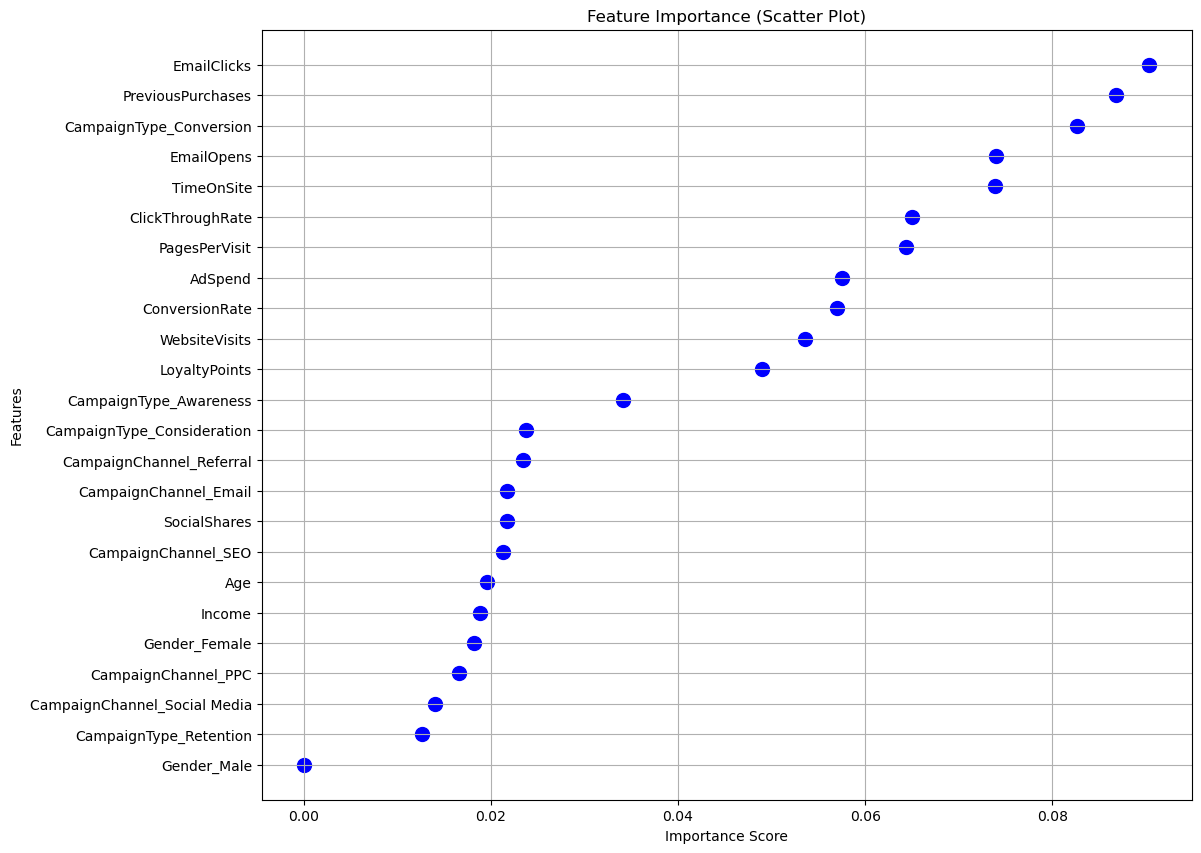

In [658]:
X = df.drop(columns=["Conversion", 'CustomerID'])
y = df["Conversion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(random_state=42, colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=200,
                      subsample=1, reg_alpha=0.1, reg_lambda=1.0)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

optimal_threshold = 0.5558796
y_pred = (y_proba >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = model.feature_importances_
features = X.columns

features_sorted = [x for _, x in sorted(zip(feature_importance, features))]
importance_sorted = sorted(feature_importance)

plt.figure(figsize=(12, 10))
plt.scatter(importance_sorted, features_sorted, color="blue", s=100)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Scatter Plot)")
plt.grid()
plt.show()

Thus, the most important factors for conversion are CampaignType_Conversion, EmailClicks, PreviousPurchases, TimeOnSite, and EmailOpens.
To maximize results, focus on the following aspects:
CampaignType_Conversion – If a specific campaign type leads to better conversions, increasing investment in scaling it can be beneficial.
EmailClicks & EmailOpens – Optimizing email content (headlines, CTA, personalization) is crucial to increasing open and click rates.
PreviousPurchases – Analyzing customer purchase behavior helps personalize offers and encourage repeat sales.
TimeOnSite – A high metric may indicate interest, but if conversions are low, UX/UI improvements and stronger CTAs should be considered.

<h2>Budget optimization</h2>

In [661]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [662]:
factor_importance = pd.Series(model.feature_importances_, index=X_train.columns)
factor_importance /= factor_importance.sum()

channel_performance = df.groupby("CampaignChannel").agg(
    Conversion=("Conversion", "sum"),
    ConversionRate=("ConversionRate", "mean"),
    ClickThroughRate=("ClickThroughRate", "mean"),
    AdSpend=("AdSpend", "sum")
)

campaign_performance = df.groupby("CampaignType").agg(
    Conversion=("Conversion", "sum"),
    ConversionRate=("ConversionRate", "mean"),
    ClickThroughRate=("ClickThroughRate", "mean"),
    AdSpend=("AdSpend", "sum")
)

valid_factors = ["Conversion", "ConversionRate", "ClickThroughRate"]
available_factors = [f for f in valid_factors if f in factor_importance.index]

channel_weights = sum(
    factor_importance[factor] * (channel_performance[factor] / channel_performance[factor].sum())
    for factor in available_factors
)

campaign_weights = sum(
    factor_importance[factor] * (campaign_performance[factor] / campaign_performance[factor].sum())
    for factor in available_factors
)

channel_weights = np.array(channel_weights)
campaign_weights = np.array(campaign_weights)

total_budget = df["AdSpend"].sum()

def optimize_budget(weights, current_spend):
    constraints = {'type': 'eq', 'fun': lambda budget_allocation: np.sum(budget_allocation) - total_budget}
    bounds = [(0.01 * total_budget, 0.8 * total_budget)] * len(weights)
    initial_budget = current_spend.to_numpy() if isinstance(current_spend, pd.Series) else np.array(current_spend)
    result = minimize(lambda b: -np.dot(weights, b), initial_budget, bounds=bounds, constraints=constraints, method='SLSQP')
    return result.x

optimized_channel_budget = optimize_budget(channel_weights, channel_performance["AdSpend"])
optimized_campaign_budget = optimize_budget(campaign_weights, campaign_performance["AdSpend"])

channel_budget_distribution = {channel: round(optimized_channel_budget[i], 2) for i, channel in enumerate(channel_performance.index)}
campaign_budget_distribution = {campaign: round(optimized_campaign_budget[i], 2) for i, campaign in enumerate(campaign_performance.index)}

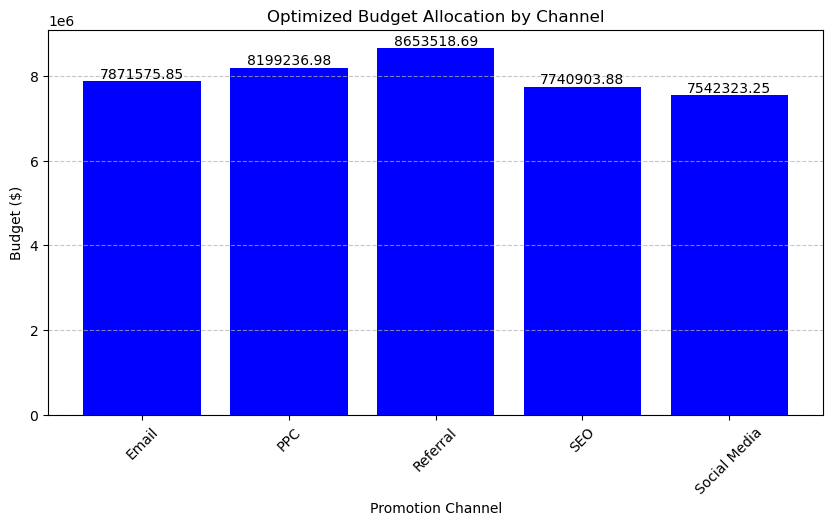

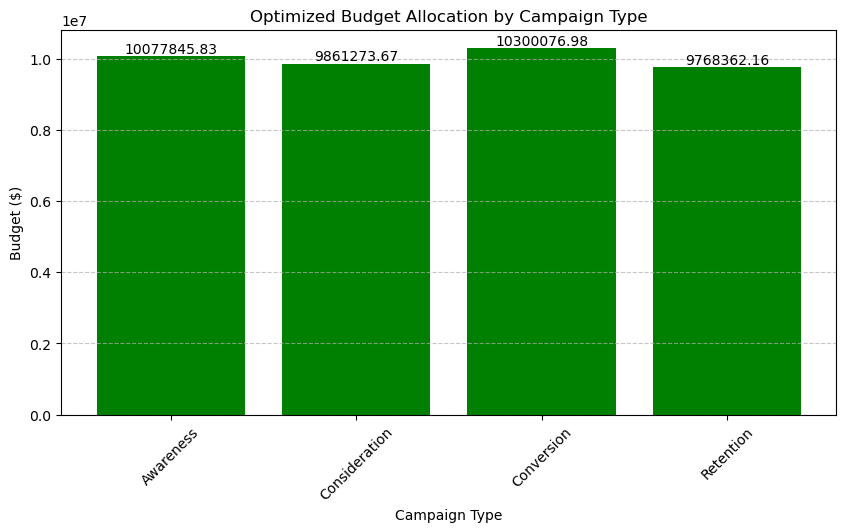

In [663]:
plt.figure(figsize=(10, 5))
bars = plt.bar(channel_budget_distribution.keys(), channel_budget_distribution.values(), color='blue')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2, bar.get_height(),
        f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10
    )

plt.xlabel("Promotion Channel")
plt.ylabel("Budget ($)")
plt.title("Optimized Budget Allocation by Channel")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
bars = plt.bar(campaign_budget_distribution.keys(), campaign_budget_distribution.values(), color='green')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2, bar.get_height(),
        f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10
    )

plt.xlabel("Campaign Type")
plt.ylabel("Budget ($)")
plt.title("Optimized Budget Allocation by Campaign Type")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()